## *Parte 1*

Se√ß√£o que realiza o download dos dados utilizados
import kagglehub
from google.colab import drive
import shutil

Nesta parte armazenamos a planilha de dados escolhida
no Google Drive do usu√°rio

Montando o local de download
drive.mount('/content/drive')
dest_path = "/content/drive/MyDrive/EST/Trabalho01"

Baixa a vers√£o mais recente dos dados
path = kagglehub.dataset_download("mohamedtag04/egypt-network-performance-data-q4-2023")

Copiar os arquivos
shutil.copytree(path, dest_path)
print("Path to dataset files:", path)

In [ ]:
!pip install geopandas
!pip install geopy
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install leafmap mapclassify
!pip geodesic

ERROR: unknown command "geodesic"


In [ ]:
#importando bibliotecas
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import leafmap.foliumap as leafmap
import folium
import scipy.stats as stats
from geopy.distance import geodesic



O dataframe possui as seguintes caracteristicas:

* avg_d_kbps

    Velocidade m√©dia de download em quilobits por segundo.

* avg_u_kbps
    
    Velocidade m√©dia de upload em quilobits por segundo.


* avg_lat_ms
    
    Lat√™ncia m√©dia em milissegundos, indicando a capacidade de resposta da rede.


* tests
    
    N√∫mero de testes realizados, fornecendo informa√ß√µes sobre o volume de pontos de dados.


* dispositivos

    N√∫mero de dispositivos usados ‚Äã‚Äãnos testes, oferecendo insights de diversidade.


* centroide_lat
    
    Coordenada de latitude do centroide geogr√°fico da localiza√ß√£o da rede.


* centr√≥ide_lon

    Coordenada de longitude do centroide geogr√°fico da localiza√ß√£o da rede.


* cidade

    Nome da cidade associada aos dados de desempenho da rede.


* velocidade_avg_mbps

    Velocidade m√©dia de download convertida em megabits por segundo para maior conveni√™ncia.


* velocidade_m√©dia_u_mbps

    Velocidade m√©dia de upload convertida em megabits por segundo para maior conveni√™ncia.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Caminho onde os dados j√° est√£o salvos
dest_path = "/content/drive/MyDrive/EST/Trabalho01"

# Ler direto do arquivo salvo
import pandas as pd

df = pd.read_csv(dest_path + "/networkperformance.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unnamed: 0  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0           0       91528       94732           4      1        1   
1           1       76459       64054          17      1        1   
2           2       24891       15299          13      7        3   
3           3       36193       56719          14      4        2   
4           4      101906       80136          11     10        2   

   centroid_lat  centroid_lon               city  avg_d_speed_mbps  \
0     27.569156     27.567444  Qa≈ür al FarƒÅfirah            91.528   
1     27.134924     27.924500  Qa≈ür al FarƒÅfirah            76.459   
2     27.061572     27.875061  Qa≈ür al FarƒÅfirah            24.891   
3     27.066463     27.891541  Qa≈ür al FarƒÅfirah            36.193   
4     27.061572     27.891541  Qa≈ür al FarƒÅfirah           101.906   

   avg_u_speed_mbps  
0            94.732  
1            64.054  
2            15.299  
3            56.719  
4            80.136

#### Plotando Mapas para observar a localiza√ß√£o dos doados


In [ ]:
from shapely.geometry import Point

# Pega os dados de locali~√£o das amostras
data_geo = df[['centroid_lat', 'centroid_lon', 'city']].copy()

# Transformando em coordenadas geograficas
data_geo['geometry'] = gpd.points_from_xy(data_geo['centroid_lon'], data_geo['centroid_lat'])

# Converte para um GeoDataFrame
geo_df = gpd.GeoDataFrame(data_geo, geometry="geometry")
print(geo_df.head())


   centroid_lat  centroid_lon               city                   geometry
0     27.569156     27.567444  Qa≈ür al FarƒÅfirah  POINT (27.56744 27.56916)
1     27.134924     27.924500  Qa≈ür al FarƒÅfirah   POINT (27.9245 27.13492)
2     27.061572     27.875061  Qa≈ür al FarƒÅfirah  POINT (27.87506 27.06157)
3     27.066463     27.891541  Qa≈ür al FarƒÅfirah  POINT (27.89154 27.06646)
4     27.061572     27.891541  Qa≈ür al FarƒÅfirah  POINT (27.89154 27.06157)


In [ ]:
df.head()
df.info()
df.describe(include='object')  # Para dados categ√≥ricos e texto
df.columns  # Ver quais colunas existem


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17871 entries, 0 to 17870
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17871 non-null  int64  
 1   avg_d_kbps        17871 non-null  int64  
 2   avg_u_kbps        17871 non-null  int64  
 3   avg_lat_ms        17871 non-null  int64  
 4   tests             17871 non-null  int64  
 5   devices           17871 non-null  int64  
 6   centroid_lat      17871 non-null  float64
 7   centroid_lon      17871 non-null  float64
 8   city              17871 non-null  object 
 9   avg_d_speed_mbps  17871 non-null  float64
 10  avg_u_speed_mbps  17871 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 1.5+ MB


Index(['Unnamed: 0', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests',
       'devices', 'centroid_lat', 'centroid_lon', 'city', 'avg_d_speed_mbps',
       'avg_u_speed_mbps'],
      dtype='object')

In [ ]:
# Tabela 1:
# Calcula estat√≠sticas de cada coluna do conjunto
df.describe()


Unnamed: 0     avg_d_kbps     avg_u_kbps    avg_lat_ms         tests  \
count  17871.000000   17871.000000   17871.000000  17871.000000  17871.000000   
mean    8935.000000   24320.552739    9353.365285     37.065637     42.168653   
std     5159.057666   39175.021429   22929.843534     72.937887    140.815593   
min        0.000000       4.000000       4.000000      0.000000      1.000000   
25%     4467.500000    9288.000000    1275.000000     13.000000      2.000000   
50%     8935.000000   16839.000000    2928.000000     21.000000      7.000000   
75%    13402.500000   24440.000000    5192.500000     35.000000     31.000000   
max    17870.000000  791794.000000  491476.000000   2456.000000  13422.000000   

            devices  centroid_lat  centroid_lon  avg_d_speed_mbps  \
count  17871.000000  17871.000000  17871.000000      17871.000000   
mean      11.246936     30.253199     31.245289         24.320553   
std      102.817435      0.685185      0.409037         39.175021   
min        1.000000     24.674474     27.567444          0.004000   
25%        1.000000     30.004895     30.989685          9.288000   
50%        2.000000     30.299389     31.231384         16.839000   
75%        8.000000     30.696973     31.451111         24.440000   
max    13311.000000     31.524703     33.192444        791.794000   

       avg_u_speed_mbps  
count      17871.000000  
mean           9.353365  
std           22.929844  
min            0.004000  
25%            1.275000  
50%            2.928000  
75%            5.192500  
max          491.476000

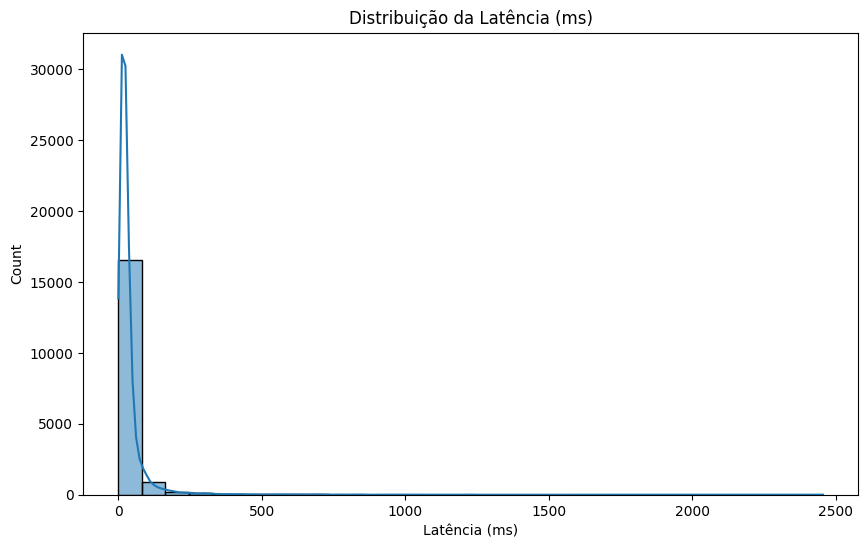

In [ ]:


# Grafico 1:
# Plota o histograma de lat√™ncia com os outliers


plt.figure(figsize=(10,6))
sns.histplot(df['avg_lat_ms'], kde=True, bins=30)
plt.title('Distribui√ß√£o da Lat√™ncia (ms)')
plt.xlabel('Lat√™ncia (ms)')
plt.show()


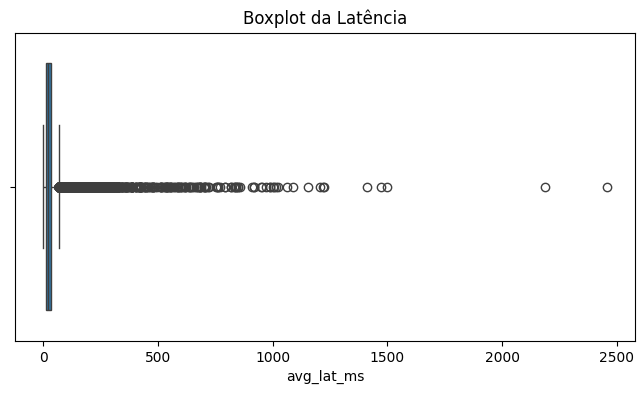

In [ ]:

# Grafico 2:
# Plota o boxplot da lat√™ncia

plt.figure(figsize=(8,4))
sns.boxplot(x=df['avg_lat_ms'])
plt.title('Boxplot da Lat√™ncia')
plt.show()


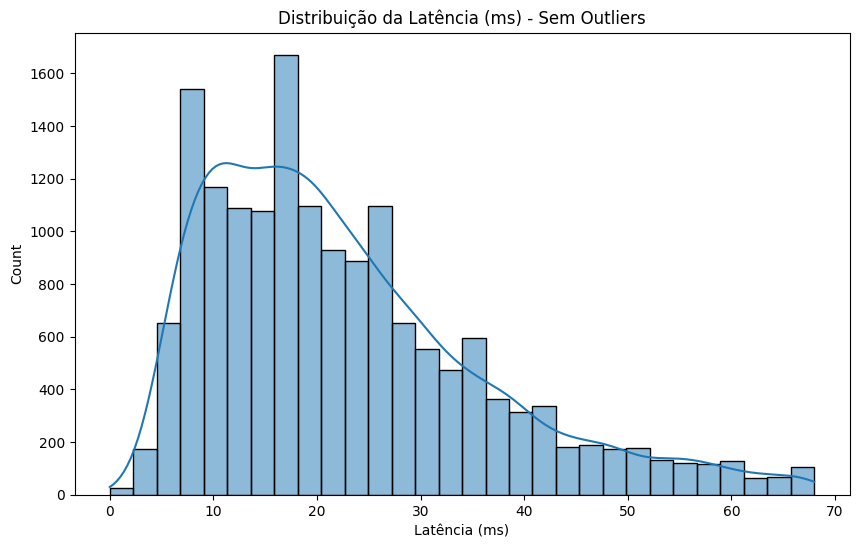

In [ ]:
# Grafico 3:
# Histograma de lat√™ncia sem outliers

# Calcula os limites do boxplot
q1 = df['avg_lat_ms'].quantile(0.25)
q3 = df['avg_lat_ms'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtra os dados removendo os outliers
df_sem_outliers = df[(df['avg_lat_ms'] >= limite_inferior) & (df['avg_lat_ms'] <= limite_superior)]


plt.figure(figsize=(10,6))
sns.histplot(df_sem_outliers['avg_lat_ms'], kde=True, bins=30)
plt.title('Distribui√ß√£o da Lat√™ncia (ms) - Sem Outliers')
plt.xlabel('Lat√™ncia (ms)')
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap


# Define o mapa
# Centraliza o mapa a partir da m√©dia de todos os centroides dados

m = folium.Map(
    location=[df['centroid_lat'].mean(), df['centroid_lon'].mean()],
    zoom_start=6,
    tiles='CartoDB positron'  # Tiles em ingl√™s, limpo e leve
)

# Cria uma lista de listas que contem os dados dos centroides
# das cidades e latencia media em cada um
heat_data = [
    [row['centroid_lat'], row['centroid_lon'], row['avg_lat_ms']]
    for index, row in df.iterrows() if not pd.isnull(row['avg_lat_ms'])
]

# Plota o heatmap a partir dos dados de heat_data
# em cima do mapa m
HeatMap(heat_data, radius=10).add_to(m)

m


#### Analisando Latencia por Cidades
Gera um agrupamento dos dados de latencia a partir da cidades egipcias e descreve alguns marcadores importantes

count ‚Üí quantidade de registros

mean ‚Üí m√©dia

std ‚Üí desvio padr√£o

min ‚Üí menor valor

25% ‚Üí primeiro quartil

50% ‚Üí mediana

75% ‚Üí terceiro quartil

max ‚Üí maior valor

In [ ]:
# Delimita dados para apenas latencia e cidade
lat_city = df[['city','avg_lat_ms']]
lat_city

city  avg_lat_ms
0      Qa≈ür al FarƒÅfirah           4
1      Qa≈ür al FarƒÅfirah          17
2      Qa≈ür al FarƒÅfirah          13
3      Qa≈ür al FarƒÅfirah          14
4      Qa≈ür al FarƒÅfirah          11
...                  ...         ...
17866         Al KhƒÅrjah          22
17867         Al KhƒÅrjah          14
17868         Al KhƒÅrjah          28
17869         Al KhƒÅrjah          59
17870         Al KhƒÅrjah          32

[17871 rows x 2 columns]

In [ ]:
# Agrupa dados por cidade, calculando inst√¢ncias,
# m√©dia, desvio padr√£o, m√≠nimo, Q1, mediana, Q3, e m√°ximo
lat_city = df.groupby('city')['avg_lat_ms'].describe().sort_values(by='mean', ascending=False)
lat_city

count        mean         std   min    25%  \
city                                                                       
Ra‚Äôs GhƒÅrib                    11.0  130.454545  363.228678   9.0  10.00   
Rosetta                         2.0   89.500000   92.630988  24.0  56.75   
Al Q≈´≈üƒ´yah                      7.0   68.857143   49.113571  20.0  29.00   
QufƒÅdah                        70.0   59.342857   66.773657   7.0  23.00   
Banƒ´ ‚ÄòUbayd                    45.0   57.600000  135.024139   0.0  18.00   
...                             ...         ...         ...   ...    ...   
Madƒ´nat as SƒÅdis min Ukt≈´bar  724.0   22.182320   32.721591   1.0   8.00   
Sidmant al Jabal               63.0   21.238095   17.128277   6.0  10.00   
Qa≈ür al FarƒÅfirah              13.0   20.692308   16.799725   4.0  13.00   
SawƒÅdah                         5.0   19.400000   15.355781   6.0   8.00   
Al Qays                         1.0   17.000000         NaN  17.0  17.00   

                               50%     75%     max  
city                                                
Ra‚Äôs GhƒÅrib                   12.0   30.50  1224.0  
Rosetta                       89.5  122.25   155.0  
Al Q≈´≈üƒ´yah                    45.0  110.00   139.0  
QufƒÅdah                       33.0   62.50   306.0  
Banƒ´ ‚ÄòUbayd                   26.0   37.00   820.0  
...                            ...     ...     ...  
Madƒ´nat as SƒÅdis min Ukt≈´bar  15.0   25.00   597.0  
Sidmant al Jabal              16.0   26.00    86.0  
Qa≈ür al FarƒÅfirah             14.0   19.00    69.0  
SawƒÅdah                       12.0   30.00    41.0  
Al Qays                       17.0   17.00    17.0  

[87 rows x 8 columns]

In [ ]:
# Acha a cidade de mais registros e a quantidade
cidade_mais_registros = lat_city['count'].idxmax()
quantidade = lat_city['count'].max()

print(f'A cidade com mais registros √© {cidade_mais_registros} com {quantidade} registros.')

# Acha a cidade de menos registros e a quantidade
cidade_menos_registros = lat_city['count'].idxmin()
quantidade_min = lat_city['count'].min()

print(f'A cidade com mais registros √© {cidade_menos_registros} com {quantidade_min} registros.')


A cidade com mais registros √© Cairo com 1586.0 registros.
A cidade com mais registros √© Ma≈£ƒÅy com 1.0 registros.


In [ ]:
# Fun√ß√£o para calcular dist√¢ncia entre dois pontos geogr√°ficos

def calcular_distancia(cidade1, cidade2, dataframe):

    # Procura os nomes de cidades dados e devolve os centroides delas
    coord1 = dataframe[dataframe['city'] == cidade1][['centroid_lat', 'centroid_lon']].iloc[0]
    coord2 = dataframe[dataframe['city'] == cidade2][['centroid_lat', 'centroid_lon']].iloc[0]

    # Utiliza da fun√ß√£o de distancia em quil√¥metros do geodesic
    return geodesic((coord1['centroid_lat'], coord1['centroid_lon']), (coord2['centroid_lat'], coord2['centroid_lon'])).kilometers


In [ ]:
calcular_distancia(cidade_mais_registros, cidade_menos_registros, data_geo)

187.4849729254773

pltando um histograma da distribui√ß√£o de latencia por cidade

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'std'}>],
       [<Axes: title={'center': 'min'}>, <Axes: title={'center': '25%'}>,
        <Axes: title={'center': '50%'}>],
       [<Axes: title={'center': '75%'}>, <Axes: title={'center': 'max'}>,
        <Axes: >]], dtype=object)

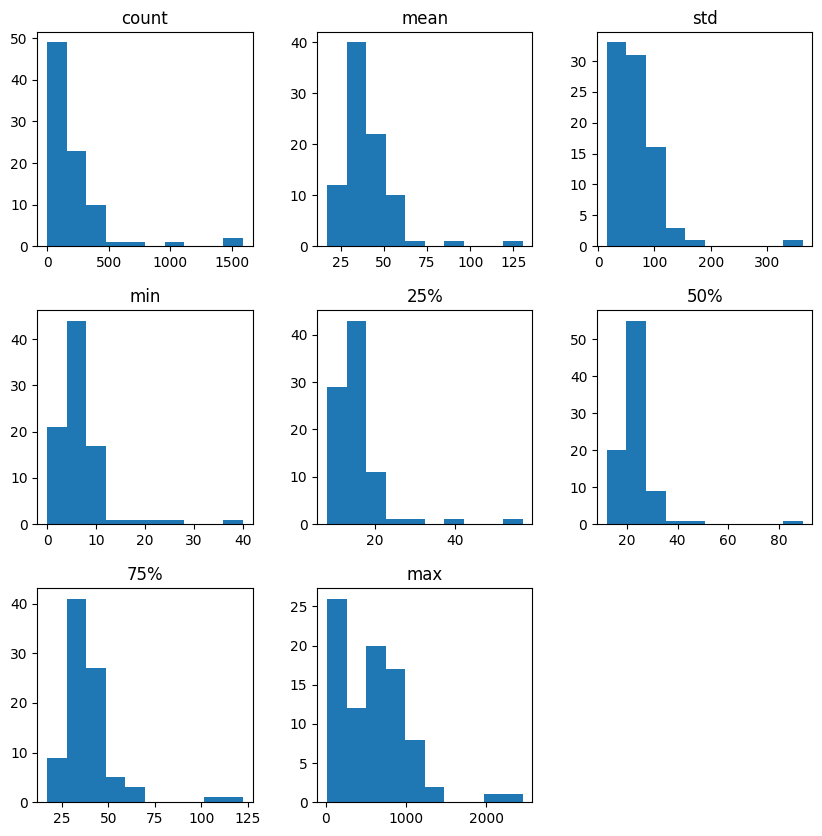

In [ ]:
# Histograma da distribui√ß√£o de latencia por cidade,
# para diversas estat√≠sticas
lat_city.hist(grid=False, figsize=(10,10))

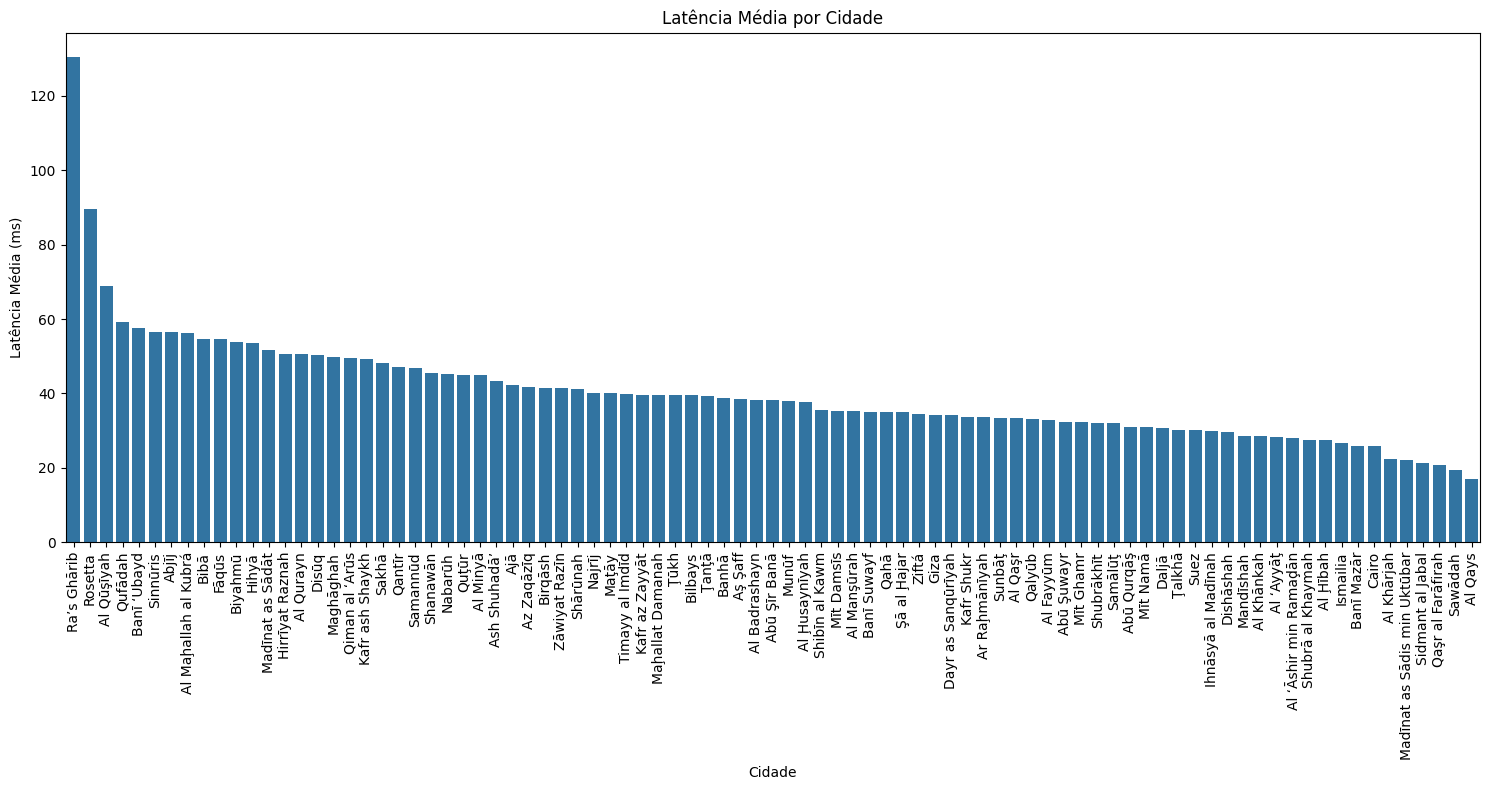

In [ ]:
# Calcula a lat√™ncia m√©dia por cidade
latencia_media_por_cidade = df.groupby('city')['avg_lat_ms'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=latencia_media_por_cidade.index, y=latencia_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os r√≥tulos do eixo x para melhor legibilidade
plt.title('Lat√™ncia M√©dia por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Lat√™ncia M√©dia (ms)')
plt.tight_layout() # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()

####  Analisando a velocidades de upload e downloads

In [ ]:
# Criando um sub-dataframe que armazena as m√©dias de download (avg_d_kbps) e upload (avg_u_kbps) por cidade
city_speeds_description = df.groupby('city')[['avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].mean()

# Ordenando as cidades pela m√©dia de velocidade de download (avg_d_kbps) em ordem decrescente
veloc_avgs = city_speeds_description.sort_values(by='avg_d_kbps', ascending=False)

# Exibindo o dataframe ordenado, com as cidades e suas respectivas velocidades m√©dias de download e upload
veloc_avgs


avg_d_kbps    avg_u_kbps  avg_lat_ms
city                                                                
Al ‚ÄòƒÄshir min Rama·∏ëƒÅn         53015.560976  26629.715122   27.967805
Ab≈´ ≈ûuwayr                    50477.116883  28952.071429   32.376623
Madƒ´nat as SƒÅdis min Ukt≈´bar  42184.595304  21802.396409   22.182320
Al KhƒÅnkah                    41977.871438  19403.220676   28.491054
Cairo                         38958.408575  18492.764817   25.757251
...                                    ...           ...         ...
ShƒÅr≈´nah                       7847.800000   1756.560000   41.280000
Al Q≈´≈üƒ´yah                     3483.428571   1284.000000   68.857143
Ma≈£ƒÅy                          2678.000000    552.000000   40.000000
Rosetta                        2361.500000    351.500000   89.500000
Al Qays                         852.000000    278.000000   17.000000

[87 rows x 3 columns]

In [ ]:
veloc_avgs.describe()

avg_d_kbps    avg_u_kbps  avg_lat_ms
count     87.000000     87.000000   87.000000
mean   17539.398958   5642.901252   40.118131
std     8975.831068   5994.515904   15.230042
min      852.000000    278.000000   17.000000
25%    13202.769145   2606.798795   31.520468
50%    15605.342365   3409.555556   38.189655
75%    18874.963517   5673.755522   46.166360
max    53015.560976  31253.384615  130.454545

array([[<Axes: title={'center': 'avg_d_kbps'}>,
        <Axes: title={'center': 'avg_u_kbps'}>],
       [<Axes: title={'center': 'avg_lat_ms'}>, <Axes: >]], dtype=object)

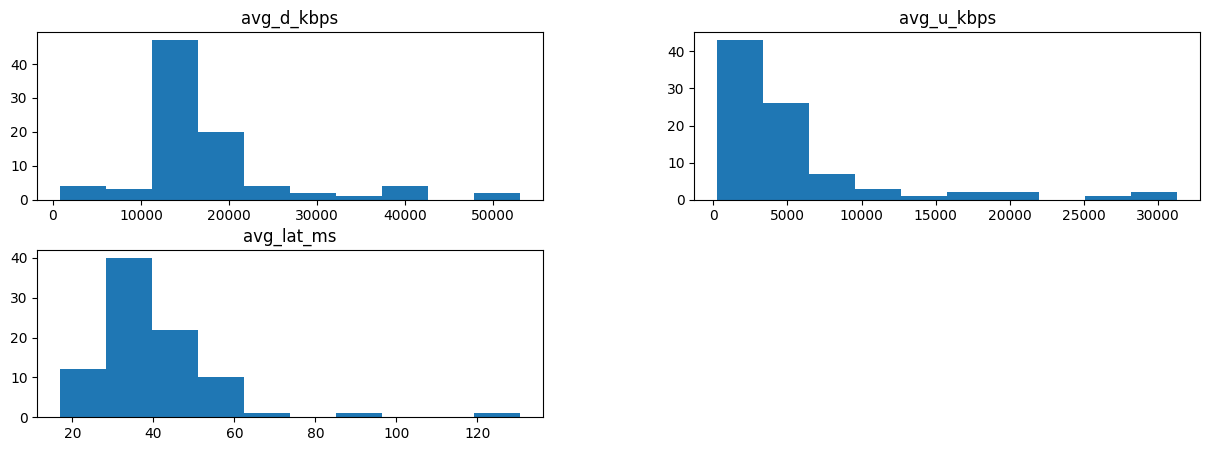

In [ ]:
# Histogramas de velocidade m√©dia de download, upload e lat√™ncia m√©dia
veloc_avgs.hist(grid=False, figsize=(15,5))

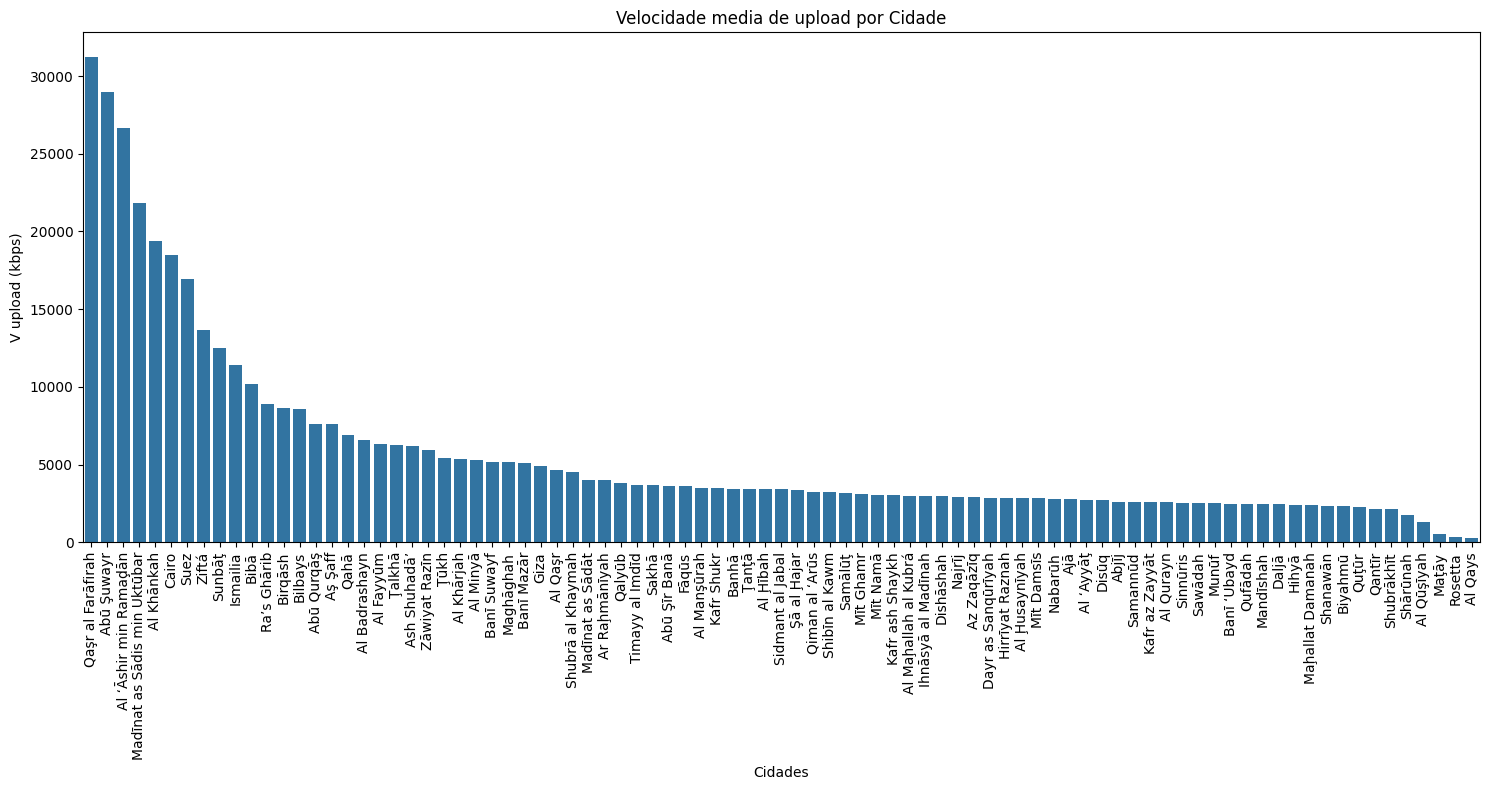

In [ ]:
# Calcula a velocidades m√©dia de upload por cidade
velu_media_por_cidade = veloc_avgs.groupby('city')['avg_u_kbps'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=velu_media_por_cidade.index, y=velu_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os r√≥tulos do eixo x para melhor legibilidade
plt.title('Velocidade media de upload por Cidade')
plt.xlabel('Cidades')
plt.ylabel('V upload (kbps)')
plt.tight_layout() # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()

In [ ]:
velu_media_por_cidade

city
Qa≈ür al FarƒÅfirah               31253.384615
Ab≈´ ≈ûuwayr                      28952.071429
Al ‚ÄòƒÄshir min Rama·∏ëƒÅn           26629.715122
Madƒ´nat as SƒÅdis min Ukt≈´bar    21802.396409
Al KhƒÅnkah                      19403.220676
                                    ...     
ShƒÅr≈´nah                         1756.560000
Al Q≈´≈üƒ´yah                       1284.000000
Ma≈£ƒÅy                             552.000000
Rosetta                           351.500000
Al Qays                           278.000000
Name: avg_u_kbps, Length: 87, dtype: float64

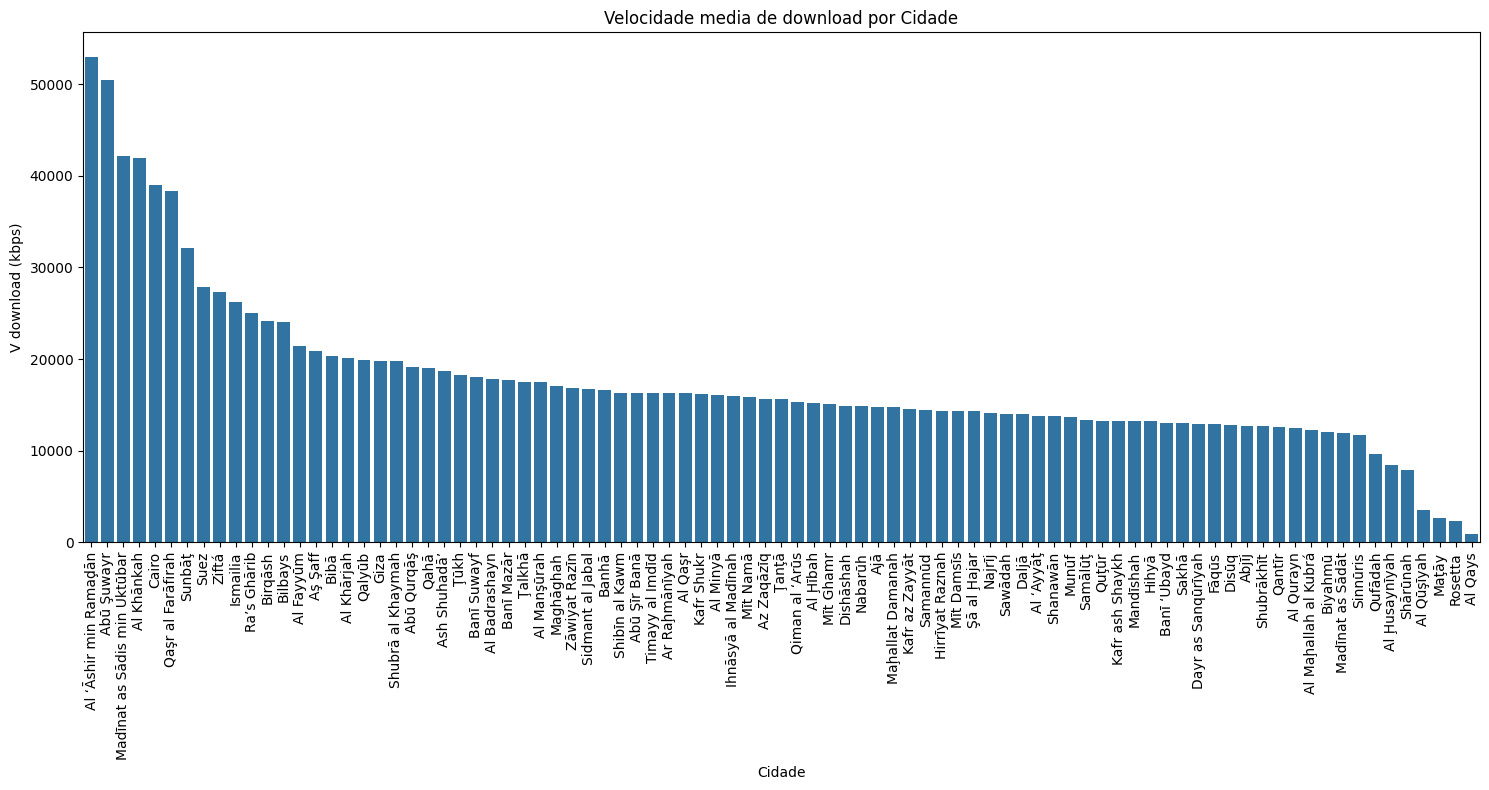

In [ ]:
# Calcula a lat√™ncia m√©dia por cidade
veld_media_por_cidade = veloc_avgs.groupby('city')['avg_d_kbps'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=veld_media_por_cidade.index, y=veld_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os r√≥tulos do eixo x para melhor legibilidade
plt.title('Velocidade media de download por Cidade')
plt.xlabel('Cidade')
plt.ylabel('V download (kbps)')
plt.tight_layout() # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()

* velocidades por cidades

In [ ]:
vel_max = veloc_avgs['avg_d_kbps'].max()
cidade_mais_rapida = veloc_avgs['avg_d_kbps'].idxmax()

vel_min = veloc_avgs['avg_d_kbps'].min()
cidade_mais_lenta = veloc_avgs['avg_d_kbps'].idxmin()


print(f'A cidade com velocidade mais r√°pida √© {cidade_mais_rapida} com {vel_max:.2f} kbps.')
print(f'A cidade com velocidade mais lenta √© {cidade_mais_lenta} com {vel_min:.2f} kbps.')

A cidade com velocidade mais r√°pida √© Al ‚ÄòƒÄshir min Rama·∏ëƒÅn com 53015.56 kbps.
A cidade com velocidade mais lenta √© Al Qays com 852.00 kbps.


In [ ]:
df['city'].value_counts()
# Ordena do maior para o menor
veloc_avgs_sorted = veloc_avgs.sort_values(by='avg_d_kbps', ascending=False)

# Exibe as 5 primeiras
print("5 Velocidades de downloads mais r√°pidas:\n", veloc_avgs_sorted.head(5))


5 Velocidades de downloads mais r√°pidas:
                                 avg_d_kbps    avg_u_kbps  avg_lat_ms
city                                                                
Al ‚ÄòƒÄshir min Rama·∏ëƒÅn         53015.560976  26629.715122   27.967805
Ab≈´ ≈ûuwayr                    50477.116883  28952.071429   32.376623
Madƒ´nat as SƒÅdis min Ukt≈´bar  42184.595304  21802.396409   22.182320
Al KhƒÅnkah                    41977.871438  19403.220676   28.491054
Cairo                         38958.408575  18492.764817   25.757251


In [ ]:
df['city'].value_counts()
# Ordena do maior para o menor
veloc_avgs_sorted = veloc_avgs.sort_values(by='avg_u_kbps', ascending=False)

# Exibe as 5 primeiras
print("5 Velocidades de uploads mais r√°pidas:\n", veloc_avgs_sorted.head(5))

5 Velocidades de uploads mais r√°pidas:
                                 avg_d_kbps    avg_u_kbps  avg_lat_ms
city                                                                
Qa≈ür al FarƒÅfirah             38395.461538  31253.384615   20.692308
Ab≈´ ≈ûuwayr                    50477.116883  28952.071429   32.376623
Al ‚ÄòƒÄshir min Rama·∏ëƒÅn         53015.560976  26629.715122   27.967805
Madƒ´nat as SƒÅdis min Ukt≈´bar  42184.595304  21802.396409   22.182320
Al KhƒÅnkah                    41977.871438  19403.220676   28.491054


### Latencia e Velocidade

Latencia √© o atraso da comunic√£o e a velocidade √© quantidades de dados transferidos por segundos

1 ou -1 -> forte rela√ß√£o entres as medidas

0 -> nenhuma correla√ß√£o

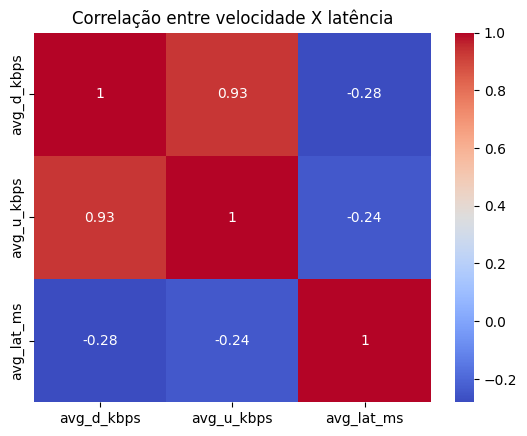

In [ ]:
corr_lat_v = veloc_avgs[['avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].corr()
# Plota a grafico

sns.heatmap(corr_lat_v, annot=True, cmap='coolwarm')
plt.title('Correla√ß√£o entre velocidade X lat√™ncia')
plt.show()

## **Parte 2** Infer√™ncia Estatistica e Modelos de Regress√£o Linear

### **Infer√™ncia Estatistica**

#### **Estima√ß√£o de Par√¢metros**

Para a lat√™ncia m√©dia, a vari√°vel principal:
* m√©dia
* desvio padr√£o
* percentis de latencia



In [ ]:
#obtendo os dados da variavel de interesse
latencia =  df['avg_lat_ms']

#obtendo as estatisticas descritivas basicas da variavel
stat_desc = {
    'Media' : latencia.mean(),
    'Mediana': latencia.median(),
    'Desvio Padr√£o': latencia.std(),
    'Vari√¢ncia': latencia.var(),
    'M√≠nimo': latencia.min(),
    'M√°ximo': latencia.max(),
    'Amplitude': latencia.max() - latencia.min(),
    'Coef. Varia√ß√£o': (latencia.std() / latencia.mean()) * 100
}
print("Tamanho da amostra: ", len(latencia))
print("** Estatisticas Descritivas sobre a Lat√™ncia **")
for stat, value in stat_desc.items():
  print(f"{stat:14}: {value:.4f}")

Tamanho da amostra:  17871
** Estatisticas Descritivas sobre a Lat√™ncia **
Media         : 37.0656
Mediana       : 21.0000
Desvio Padr√£o : 72.9379
Vari√¢ncia     : 5319.9353
M√≠nimo        : 0.0000
M√°ximo        : 2456.0000
Amplitude     : 2456.0000
Coef. Varia√ß√£o: 196.7803


O fato da m√©dia ser maior do que a mediana colabora com os gr√°ficos de outliers extremos que tivemos na parte 1. Os valores extremos parecem arrastar a m√©dia para um valor a mais que a mediana. Podemos verificar o mesmo com os percentis abaixo.

In [ ]:
#avaliando os percentis
p_values = [5, 10, 25, 50, 75, 90, 95,99]


for p in p_values:
  valor = np.percentile(latencia, p)
  if p == 10:
    p10 = valor
  elif p == 50:
    p50 = valor
  elif p == 90:
    p90 = valor
  print(f"P{p:2d}: {valor:.4f}")

dif_inferior = p50 - p10
porc_inferior = dif_inferior * 100 / p50

dif_superior = p90 - p50
porc_superior = dif_superior * 100 / p50

dif_sup_inf = porc_superior - porc_inferior
porc_dif = dif_sup_inf * 100 / porc_inferior

print(f"Do P50 ({p50}) at√© o P10 ({p10}) o decrescimo √© de apenas {dif_inferior:.1f} (-{porc_inferior:.1f}%)")
print(f"Do P50 ({p50}) at√© o P90 ({p90}) o aumento √© de {dif_superior:.1f} ({porc_superior:.1f}%)")
print(f"Diferen√ßa de m√≥dulo entre acrescimos: o superior √© {dif_sup_inf:.1f} ({porc_dif:.1f}%) maior em rela√ß√£o ao inferior")

P 5: 7.0000
P10: 8.0000
P25: 13.0000
P50: 21.0000
P75: 35.0000
P90: 66.0000
P95: 105.0000
P99: 315.3000
Do P50 (21.0) at√© o P10 (8.0) o decrescimo √© de apenas 13.0 (-61.9%)
Do P50 (21.0) at√© o P90 (66.0) o aumento √© de 45.0 (214.3%)
Diferen√ßa de m√≥dulo entre acrescimos: o superior √© 152.4 (246.2%) maior em rela√ß√£o ao inferior


Assim, os percentis acima demonstram que h√° assimetria positiva (para a direita). Pelo menos 10% dos dados est√£o muito acima da mediana, com pelo menos 214,3% de aumento. Em contraste, os 10% dos dados com menores valores possuem um decrescimo de pelo menos 61,9%. Se utilizarmos a porcentagem de decrescimo inferior como base, o aumento superior foi 246,2% maior, oque √© muito significativo.

Portanto, vamos analisar a condi√ß√£o dos outliers:

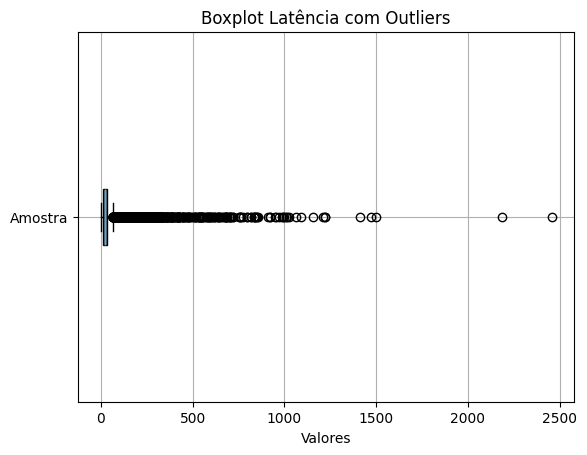

In [ ]:
# Criar boxplot
plt.boxplot(latencia, vert=False, patch_artist=True)

# Adicionar t√≠tulo e legenda
plt.title('Boxplot Lat√™ncia com Outliers')
plt.xlabel('Valores')
plt.yticks([1], ['Amostra'])

# Exibir gr√°fico
plt.grid(True)
plt.show()

Como h√° muito outliers, vamos utilizar os dados j√° tratados, conforme fizemos na parte 1 do trabalho.

In [ ]:
lat_treat = df_sem_outliers['avg_lat_ms']

#obtendo as estatisticas descritivas basicas da variavel
stat_desc2 = {
    'Media' : lat_treat.mean(),
    'Mediana': lat_treat.median(),
    'Desvio Padr√£o': lat_treat.std(),
    'Vari√¢ncia': lat_treat.var(),
    'M√≠nimo': lat_treat.min(),
    'M√°ximo': lat_treat.max(),
    'Amplitude': lat_treat.max() - lat_treat.min(),
    'Coef. Varia√ß√£o': (lat_treat.std() / lat_treat.mean()) * 100
}
print("Tamanho da amostra: ", len(lat_treat))
print("** Estatisticas Descritivas sobre a Lat√™ncia **")
for stat, value in stat_desc2.items():
  print(f"{stat:14}: {value:.4f}")

Tamanho da amostra:  16157
** Estatisticas Descritivas sobre a Lat√™ncia **
Media         : 22.7081
Mediana       : 20.0000
Desvio Padr√£o : 13.5701
Vari√¢ncia     : 184.1482
M√≠nimo        : 0.0000
M√°ximo        : 68.0000
Amplitude     : 68.0000
Coef. Varia√ß√£o: 59.7591


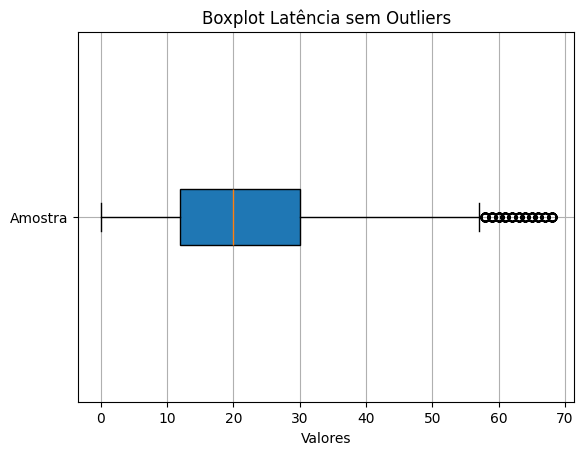

In [ ]:

# Criar boxplot
plt.boxplot(lat_treat, vert=False, patch_artist=True)

# Adicionar t√≠tulo e legenda
plt.title('Boxplot Lat√™ncia sem Outliers')
plt.xlabel('Valores')
plt.yticks([1], ['Amostra'])

# Exibir gr√°fico
plt.grid(True)
plt.show()

O novo boxplot permite ver que a distribui√ß√£o assim√©trica positiva permanece.

Para verificar o mesmo, fazemos a gr√°fico de distribui√ß√£o:

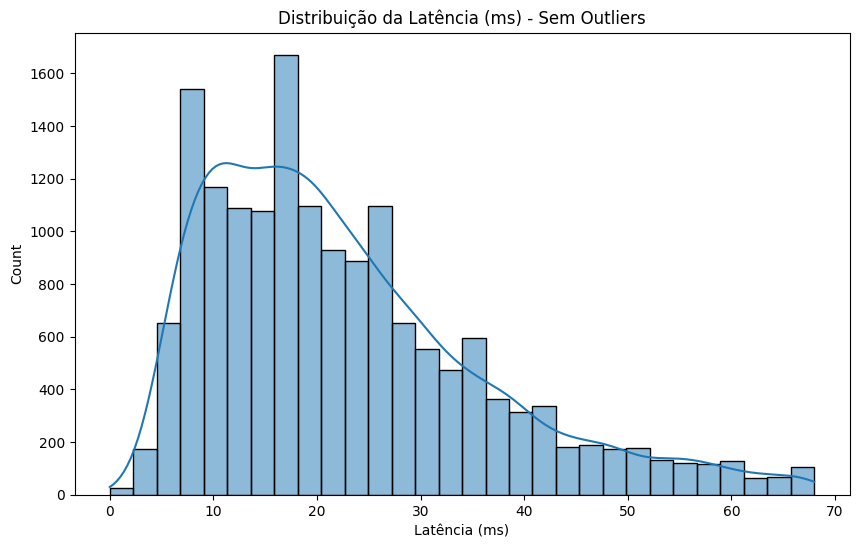

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(lat_treat, kde=True, bins=30)
plt.title('Distribui√ß√£o da Lat√™ncia (ms) - Sem Outliers')
plt.xlabel('Lat√™ncia (ms)')
plt.show()

A cauda est√° para a direita em uma distribui√ß√£o assim√©trica, conforme previsto.

*texto em it√°lico*##### Estimando o Intervalo de Confian√ßa



Como a amostra √© grande, o teorema central do limite permite que usemos a distribui√ß√£o normal como aproxima√ß√£o. Ainda assim, apresentamos o intervalo com a distribui√ß√£o t apenas para compara√ß√£o

In [ ]:
n = len(lat_treat)
media_amostral = stat_desc2['Media']
dp = stat_desc2['Desvio Padr√£o']
ep = dp / n**(1/2)

#ic com 95 de precisao
alfa = 0.05
t_critico = stats.t.ppf((1 + alfa)/2, df=n-1)
lim_inf = media_amostral - t_critico * ep
lim_sup = media_amostral + t_critico * ep
print("Utilizando a distribui√ß√£o T-Student para estimar o intervalo da med√≠a populacional (Œº)")
print(f"O intervalo de confian√ßa estimado para a m√©dia com 95% de precis√£o √©: [{lim_inf:.4f}, {lim_sup:.4f}]")
print(f"  Margem de erro: ¬±{t_critico * ep:.3f} ms")

Utilizando a distribui√ß√£o T-Student para estimar o intervalo da med√≠a populacional (Œº)
O intervalo de confian√ßa estimado para a m√©dia com 95% de precis√£o √©: [22.7014, 22.7147]
  Margem de erro: ¬±0.007 ms


In [ ]:
#utilizando a distribui√ß√£o normal
z = stats.norm.ppf((1 + alfa)/2)
zlim_inf = media_amostral - z * ep
zlim_sup = media_amostral + z * ep

print(f"Utilizando a distribui√ß√£o Normal para estimar o intervalo da med√≠a populacional (Œº)")
print(f"O intervalo de confian√ßa estimado para a m√©dia com 95% de precis√£o √©: [{zlim_inf:.4f}, {zlim_sup:.4f}]")
print(f"  Margem de erro: ¬±{z * ep:.3f} ms")

Utilizando a distribui√ß√£o Normal para estimar o intervalo da med√≠a populacional (Œº)
O intervalo de confian√ßa estimado para a m√©dia com 95% de precis√£o √©: [22.7014, 22.7147]
  Margem de erro: ¬±0.007 ms


Esses dados colaboram com a m√©dia de 22.7081 encontrada na amostra geral.

Utilizando o EMV

In [ ]:
# Estima√ß√£o por m√°xima verossimilhan√ßa (assumindo normal)
mu_emv, sigma_emv = stats.norm.fit(lat_treat)
print("Supondo uma distribui√ß√£o normal:")
print(f"Estimativa da m√©dia (Œº) por EMV: {mu_emv:.2f}")
print(f"Estimativa do desvio padr√£o (œÉ) por EMV: {sigma_emv:.2f}")

Supondo uma distribui√ß√£o normal:
Estimativa da m√©dia (Œº) por EMV: 22.71
Estimativa do desvio padr√£o (œÉ) por EMV: 13.57


In [ ]:
# 5. ESTIMATIVA POR CIDADE
print("\n5. ESTIMATIVA POR CIDADE")

stats_cidade = df_sem_outliers.groupby('city')['avg_lat_ms'].agg([
    'count', 'mean', 'std', 'min', 'max'
])

# Estat√≠sticas adicionais
stats_cidade['skewness'] = df_sem_outliers.groupby('city')['avg_lat_ms'].skew()
#stats_cidade['kurtosis'] = df_sem_outliers.groupby('city')['avg_lat_ms'].kurtosis()
stats_cidade['percentile_25'] = df_sem_outliers.groupby('city')['avg_lat_ms'].quantile(0.25)
stats_cidade['percentile_75'] = df_sem_outliers.groupby('city')['avg_lat_ms'].quantile(0.75)
stats_cidade['iqr'] = stats_cidade['percentile_75'] - stats_cidade['percentile_25']
stats_cidade['cv'] = stats_cidade['std'] / stats_cidade['mean']  # Coeficiente de varia√ß√£o

print(stats_cidade)



5. ESTIMATIVA POR CIDADE
               count       mean        std  min  max  skewness  percentile_25  \
city                                                                            
Abjƒ´j            181  24.441989  14.871793    5   68  1.036391           13.0   
Ab≈´ QurqƒÅ≈ü         8  26.000000  18.731181    6   62  0.999396           12.5   
Ab≈´ ≈ûuwayr       138  16.514493  13.467038    2   68  1.836524            8.0   
Ab≈´ ≈ûƒ´r BanƒÅ      50  24.800000  14.916092    7   68  1.318550           14.0   
AjƒÅ              179  24.474860  13.671638    7   68  1.288818           15.0   
...              ...        ...        ...  ...  ...       ...            ...   
ZƒÅwiyat Razƒ´n    240  24.270833  15.003402    0   68  0.982616           12.0   
≈ûƒÅ al ·∏®ajar      135  19.755556  12.292739    5   59  1.149898           10.0   
≈¢alkhƒÅ            79  24.924051  10.814013   10   61  0.941307           17.5   
≈¢an≈£ƒÅ            365  26.846575  14.444419    5   68  0.91873

In [ ]:
# 6. AN√ÅLISE DE OUTLIERS
print("\n6. AN√ÅLISE DE OUTLIERS")

# M√©todo IQR
Q1 = lat_treat.quantile(0.25)
Q3 = lat_treat.quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

outliers_iqr = lat_treat[(lat_treat < limite_inf) | (lat_treat > limite_sup)]
print(f"M√©todo IQR:")
print(f"  Limites: [{limite_inf:.3f}, {limite_sup:.3f}] ms")
print(f"  N√∫mero de outliers: {len(outliers_iqr)} ({len(outliers_iqr)/len(latencia)*100:.1f}%)")



6. AN√ÅLISE DE OUTLIERS
M√©todo IQR:
  Limites: [-15.000, 57.000] ms
  N√∫mero de outliers: 422 (2.4%)


In [ ]:
print(f"‚Ä¢ 50% dos valores est√£o abaixo de {lat_treat.median():.2f} ms")
print(f"‚Ä¢ 95% dos valores est√£o abaixo de {np.percentile(lat_treat, 95):.2f} ms")

‚Ä¢ 50% dos valores est√£o abaixo de 20.00 ms
‚Ä¢ 95% dos valores est√£o abaixo de 51.00 ms


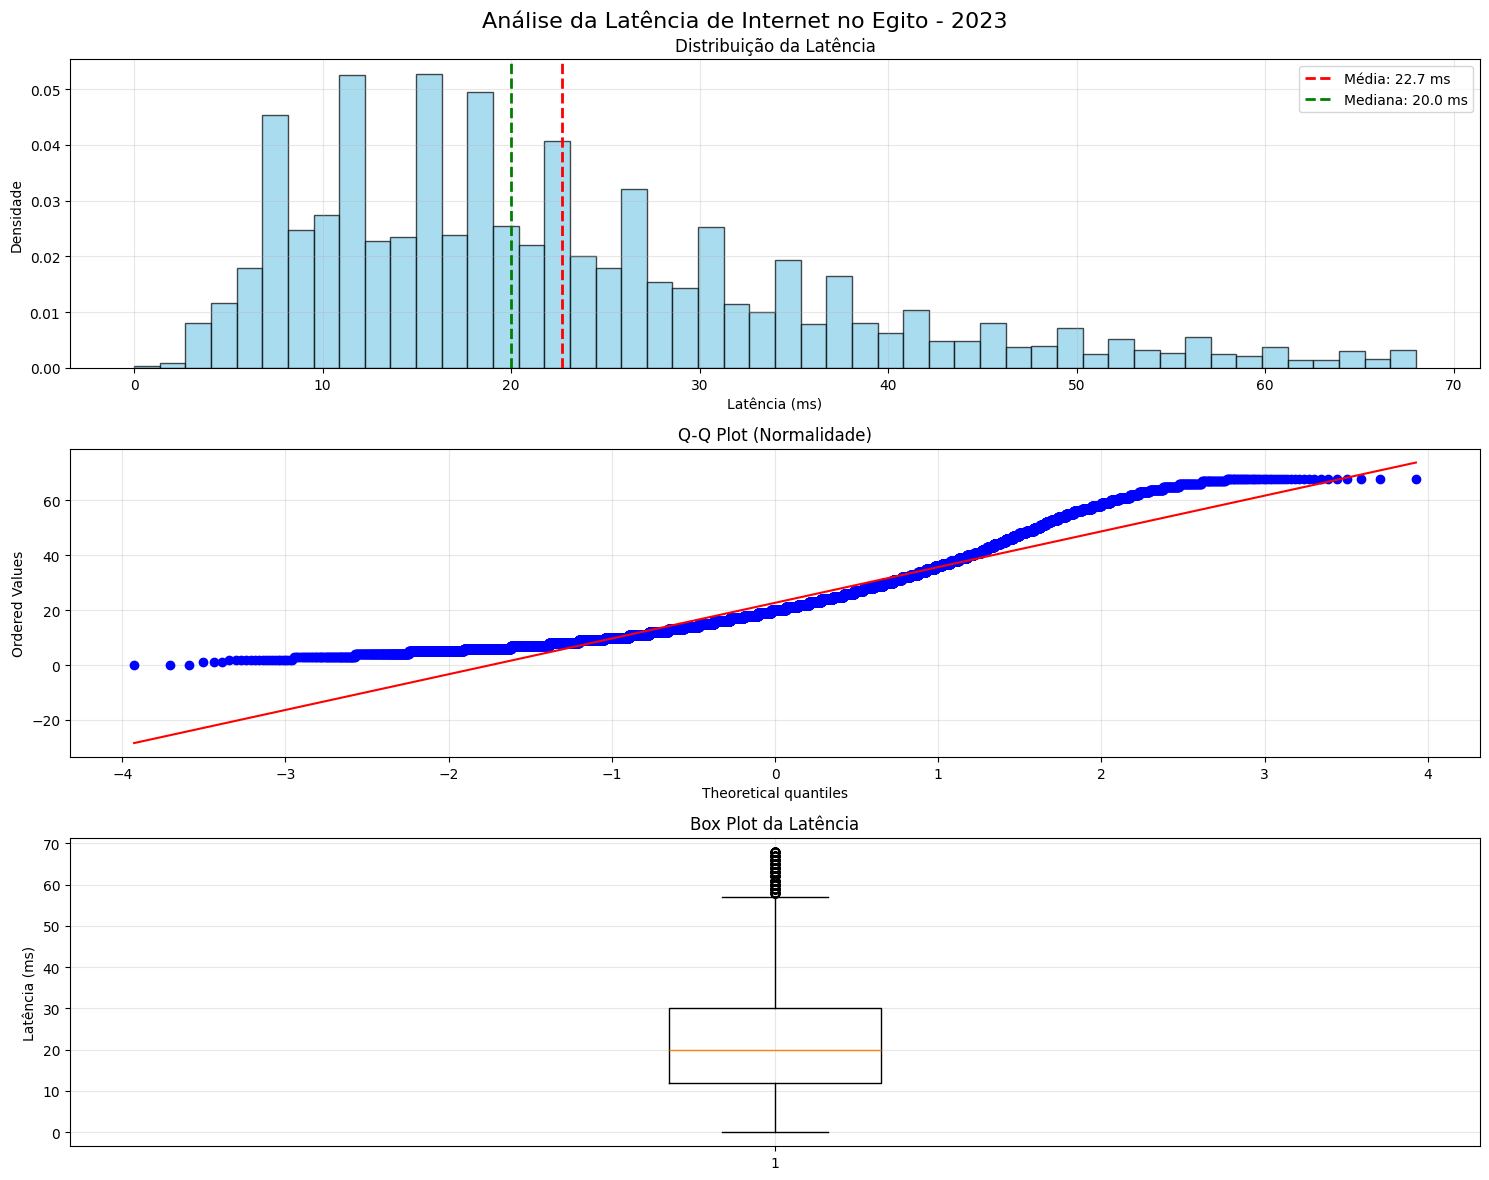

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(15,12))
fig.suptitle('An√°lise da Lat√™ncia de Internet no Egito - 2023', fontsize=16)

# Histograma
axes[0].hist(lat_treat, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(media_amostral, color='red', linestyle='--', linewidth=2, label=f'M√©dia: {media_amostral:.1f} ms')
axes[0].axvline(lat_treat.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {lat_treat.median():.1f} ms')
axes[0].set_xlabel('Lat√™ncia (ms)')
axes[0].set_ylabel('Densidade')
axes[0].set_title('Distribui√ß√£o da Lat√™ncia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(lat_treat, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normalidade)')
axes[1].grid(True, alpha=0.3)


# Box plot geral
axes[2].boxplot(lat_treat, vert=True)
axes[2].set_ylabel('Lat√™ncia (ms)')
axes[2].set_title('Box Plot da Lat√™ncia')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Teste de Hip√≥teses

Objetivo do Teste

Verificar se a lat√™ncia m√©dia de internet no Egito √© significativamente menor que 35 ms.

Hip√≥teses Definidas

* H‚ÇÄ (Hip√≥tese Nula): Œº ‚â• 35 ms (a lat√™ncia m√©dia √© maior ou igual a 35 ms)
* H‚ÇÅ (Hip√≥tese Alternativa): Œº < 35 ms (a lat√™ncia m√©dia √© menor que 35 ms)
* Tipo de teste: Unilateral √† esquerda

Dados da Amostra

* Tamanho da amostra: 16.157 observa√ß√µes
* M√©dia amostral: 22,71 ms
* Desvio padr√£o: 13,57 ms
* Erro padr√£o: 0,107 ms



In [ ]:
from scipy.stats import t, norm

In [ ]:
mu_h0 = 35
print("media amostral: ", media_amostral)
t_calc =  ((media_amostral - mu_h0) / ep) #utlizando a media estimada por max verossimilhan√ßa
gl = n-1
print("Graus de linberdade de t student: ", gl)
print(f"O valor de T ou Z calculado √©: {t_calc:.4f}")

alpha = 0.05
t_critico = t.ppf((alpha), gl)
p_valor =t.cdf(t_calc, gl)
regiao_critica = f"t < {t_critico:.4f}"
print(f"Valor cr√≠tico (Œ± = {alpha}, unilateral √† esquerda): {t_critico:.4f}")
print(f"Regi√£o cr√≠tica: {regiao_critica}")
print(f"P-valor: {p_valor:.6f}")

# Crit√©rio de Rejei√ß√£o de H0 para teste unilateral √† esquerda:
# Rejeitamos H0 se t_calc < t_critico
rejeita_h0 = t_calc < t_critico
rejeita_h0_pvalor = p_valor < alpha

media amostral:  22.708052237420315
Graus de linberdade de t student:  16156
O valor de T ou Z calculado √©: -115.1377
Valor cr√≠tico (Œ± = 0.05, unilateral √† esquerda): -1.6449
Regi√£o cr√≠tica: t < -1.6449
P-valor: 0.000000


In [ ]:
print(f"Crit√©rio do valor cr√≠tico:")
if rejeita_h0:
  print(f"‚úó |t_calc| = {abs(t_calc):.4f} est√° na regi√£o cr√≠tica")
  print(f"‚úó REJEITAMOS H‚ÇÄ, pois √© Menor que {mu_h0}")
else:
  print(f"‚úì |t_calc| = {abs(t_calc):.4f} N√ÉO est√° na regi√£o cr√≠tica")
  print(f"‚úì N√ÉO REJEITAMOS H‚ÇÄ, n√£o h√° evid√™ncias suficientes")

print(f"\nCrit√©rio do p-valor:")
if rejeita_h0_pvalor:
  print(f"‚úó p-valor = {p_valor:.6f} < Œ± = {alpha}")
  print(f"‚úó REJEITAMOS H‚ÇÄ")
else:
  print(f"‚úì p-valor = {p_valor:.6f} ‚â• Œ± = {alpha}")
  print(f"‚úì N√ÉO REJEITAMOS H‚ÇÄ")

Crit√©rio do valor cr√≠tico:
‚úó |t_calc| = 115.1377 est√° na regi√£o cr√≠tica
‚úó REJEITAMOS H‚ÇÄ, pois √© Menor que 35

Crit√©rio do p-valor:
‚úó p-valor = 0.000000 < Œ± = 0.05
‚úó REJEITAMOS H‚ÇÄ


In [ ]:
  t_ic = t.ppf(1 - alpha/2, gl)
  margem_erro = t_ic * ep
  ic_inf = media_amostral - margem_erro
  ic_sup = media_amostral + margem_erro

  if mu_h0 >= ic_inf and mu_h0 <= ic_sup:
        print(f"‚úì Œº‚ÇÄ = {mu_h0} EST√Å dentro do IC ‚Üí Consistente com n√£o rejei√ß√£o de H‚ÇÄ")
  else:
        print(f"‚úó Œº‚ÇÄ = {mu_h0} N√ÉO EST√Å dentro do IC ‚Üí Consistente com rejei√ß√£o de H‚ÇÄ")


‚úó Œº‚ÇÄ = 35 N√ÉO EST√Å dentro do IC ‚Üí Consistente com rejei√ß√£o de H‚ÇÄ


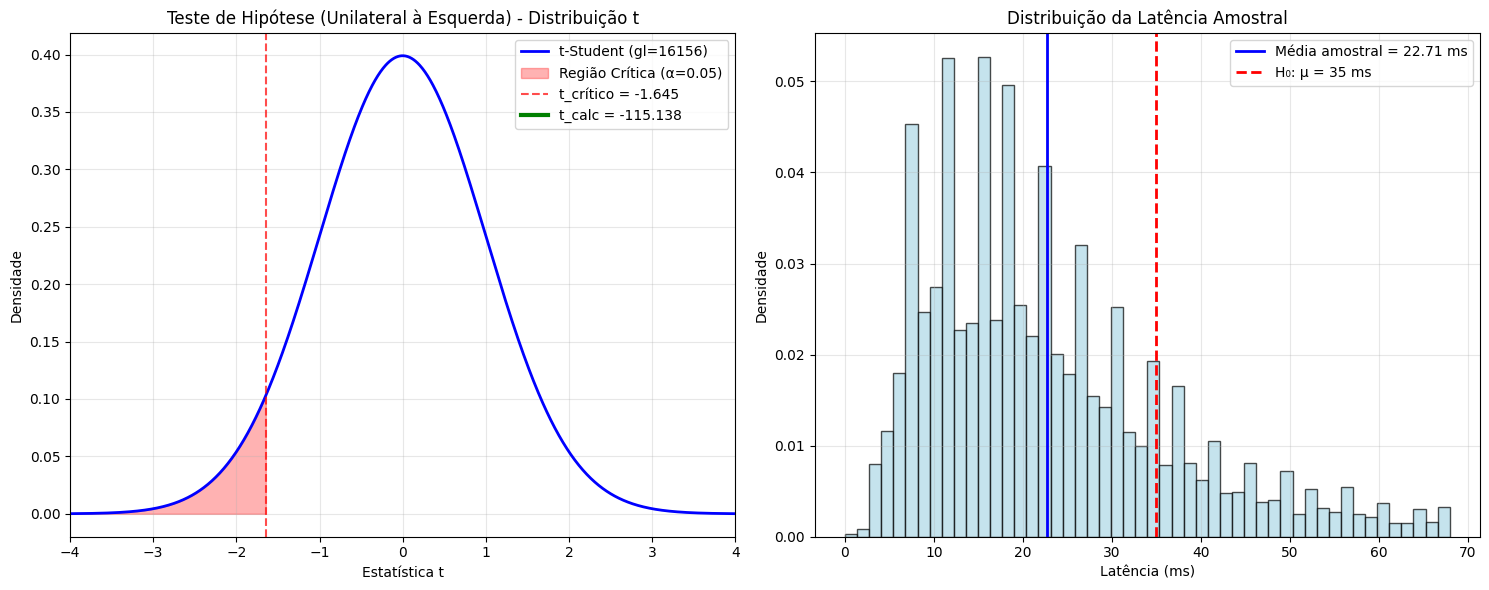

Estat√≠stica t: -115.1377
Valor cr√≠tico: -1.6449
P-valor: 0.000000
‚úó N√ÉO REJEITAMOS H‚ÇÄ


In [ ]:
# --- Gera√ß√£o dos Gr√°ficos ---
x_t = np.linspace(-4, 4, 1000) # Ajustado o limite para melhor visualiza√ß√£o da cauda esquerda
y_t = t.pdf(x_t, gl)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: Corre√ß√£o do valor cr√≠tico para teste unilateral √† esquerda
ax1.plot(x_t, y_t, 'b-', linewidth=2, label=f't-Student (gl={gl})')

# Regi√£o Cr√≠tica: valores MENORES ou IGUAIS ao t_critico
x_crit = x_t[x_t <= t_critico] # CORRIGIDO: <= t_critico
ax1.fill_between(x_crit, t.pdf(x_crit, gl), alpha=0.3, color='red',
                 label=f'Regi√£o Cr√≠tica (Œ±={alpha})')
ax1.axvline(t_critico, color='red', linestyle='--', alpha=0.7,
            label=f't_cr√≠tico = {t_critico:.3f}')
ax1.axvline(t_calc, color='green', linewidth=3, label=f't_calc = {t_calc:.3f}')

ax1.set_xlabel('Estat√≠stica t')
ax1.set_ylabel('Densidade')
ax1.set_title('Teste de Hip√≥tese (Unilateral √† Esquerda) - Distribui√ß√£o t')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(x_t.min(), x_t.max()) # Usar os limites definidos para x_t

# Gr√°fico 2: Distribui√ß√£o da amostra com valores de refer√™ncia
ax2.hist(lat_treat, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
ax2.axvline(media_amostral, color='blue', linewidth=2,
            label=f'M√©dia amostral = {media_amostral:.2f} ms')
ax2.axvline(mu_h0, color='red', linewidth=2, linestyle='--',
            label=f'H‚ÇÄ: Œº = {mu_h0} ms')
ax2.set_xlabel('Lat√™ncia (ms)')
ax2.set_ylabel('Densidade')
ax2.set_title('Distribui√ß√£o da Lat√™ncia Amostral')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resultado do teste
print(f"Estat√≠stica t: {t_calc:.4f}")
print(f"Valor cr√≠tico: {t_critico:.4f}")
print(f"P-valor: {p_valor:.6f}")

if t_calc > t_critico:
    print("‚úì REJEITAMOS H‚ÇÄ")
else:
    print("‚úó N√ÉO REJEITAMOS H‚ÇÄ")


Decis√£o Estat√≠stica

* Crit√©rio do valor cr√≠tico: |-115,14| > 1,64 ‚Üí REJEITAMOS H‚ÇÄ

* Crit√©rio do p-valor: p < 0,05 ‚Üí REJEITAMOS H‚ÇÄ

* Intervalo de confian√ßa: [22,70; 22,71] ‚Üí 35 ms est√° FORA do intervalo

Conclus√£o Pr√°tica

 H√° evid√™ncia estat√≠stica muito forte de que a lat√™ncia m√©dia de internet no Egito √© significativamente menor que 35 ms.
Com 95% de confian√ßa, podemos afirmar que a lat√™ncia m√©dia populacional est√° entre 22,70 e 22,71 ms, valor bem abaixo dos 35 ms testados.

### **Modelos de Regress√£o**


Utilizando uma matriz de correla√ß√£o para definir quais variaveis s√£o favor√°veis para a regress√£o linear

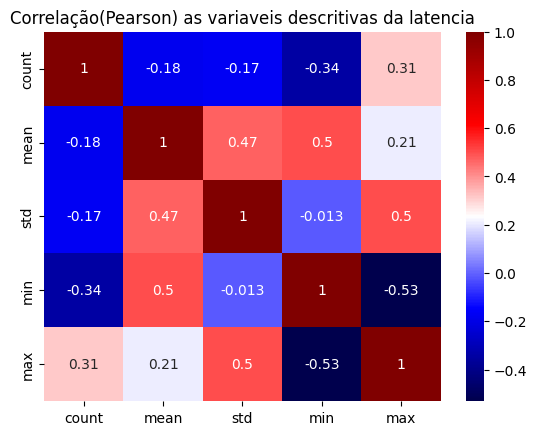

In [ ]:
corr_lat = stats_cidade[['count', 'mean', 'std', 'min', 'max']].corr()
# Plota a grafico

sns.heatmap(corr_lat, annot=True, cmap='seismic')
plt.title('Correla√ß√£o(Pearson) as variaveis descritivas da latencia')
plt.show()

Pelo gr√°fico acima, podemos notar que as vari√°vies media e desvio padr√£o possuem uma correla√ß√£o moderada positiva indicando que cidades com m√©dia de lat√™ncia maior tendem a ter mais variabilidade.

Um maior m√°ximo costuma indicar um menor m√≠nimo.

Realizando a Regress√£o Linear Simples para Media e Desvio Padr√£o

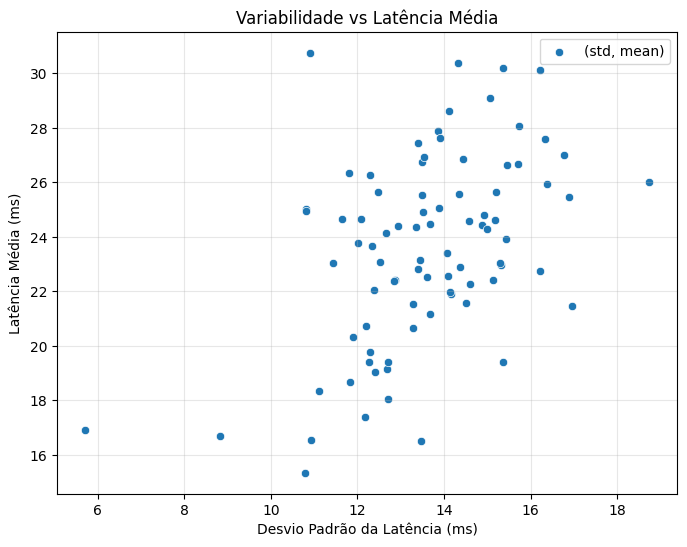

In [ ]:
#plotando o gr√°fico de dispers√£o da Media x STD
dados = stats_cidade[['std', 'mean']].dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['std'], y=dados['mean'], label='(std, mean)')
plt.xlabel('Desvio Padr√£o da Lat√™ncia (ms)')
plt.ylabel('Lat√™ncia M√©dia (ms)')
plt.title('Variabilidade vs Lat√™ncia M√©dia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

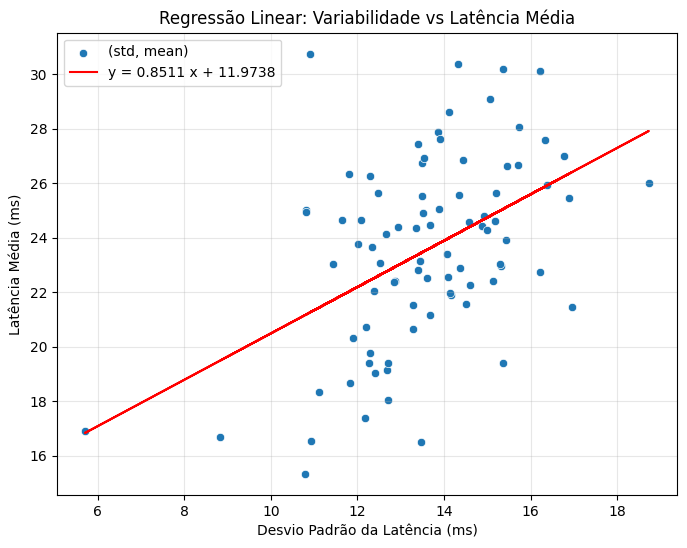

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Dados
x = dados['std'].values.reshape(-1, 1)
y = dados['mean'].values

# Regress√£o
modelo = LinearRegression().fit(x, y)
y_pred = modelo.predict(x)
a = modelo.coef_[0]
b = modelo.intercept_
r1 = modelo.score(x,y)


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['std'], y=dados['mean'], label='(std, mean)')
plt.plot(dados['std'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.xlabel('Desvio Padr√£o da Lat√™ncia (ms)')
plt.ylabel('Lat√™ncia M√©dia (ms)')
plt.title('Regress√£o Linear: Variabilidade vs Lat√™ncia M√©dia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


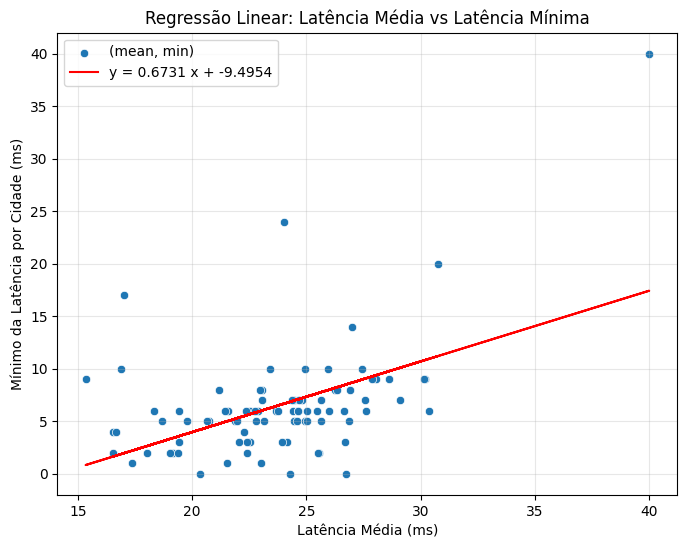

0.6731x + -9.4954


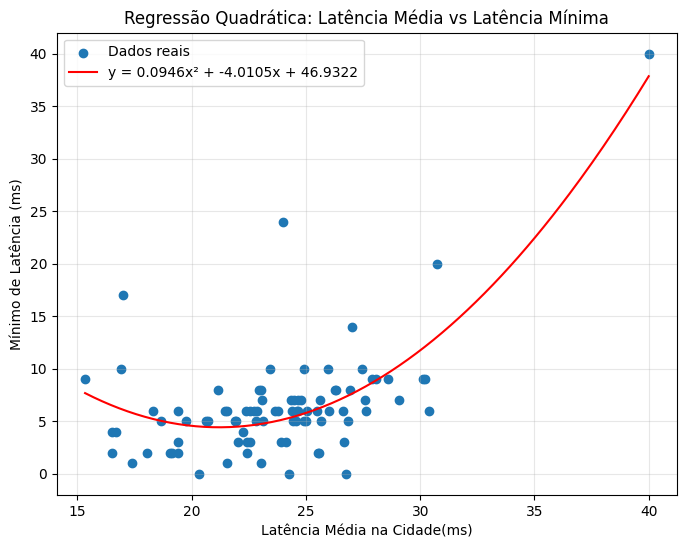

0.0946x^2 + -4.0105x + 46.9322
Ponto m√≠nimo da equa√ß√£o: x = 21.1991

R¬≤ linear: 0.2476
R¬≤ quad: 0.5436


In [ ]:
#Latencia m√©dia e m√≠nima

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


dados = stats_cidade[['mean', 'min']].dropna()

# Dados
x = dados['mean'].values.reshape(-1, 1)
y = dados['min'].values

# Regress√£o
modelo = LinearRegression().fit(x, y)
y_pred = modelo.predict(x)
a = modelo.coef_[0]
b = modelo.intercept_
r1 = modelo.score(x,y)


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['mean'], y=dados['min'], label='(mean, min)')
plt.plot(dados['mean'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.ylabel('M√≠nimo da Lat√™ncia por Cidade (ms)')
plt.xlabel('Lat√™ncia M√©dia (ms)')
plt.title('Regress√£o Linear: Lat√™ncia M√©dia vs Lat√™ncia M√≠nima')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"{a:.4f}x + {b:.4f}")

# Dados
x = dados['mean'].values
y = dados['min'].values

# Ajuste polinomial de grau 2 (quadr√°tico)
coefs = np.polyfit(x, y, 2)  # grau 2
a, b, c = coefs

# Gerar valores de x ordenados e y previstos
x_seq = np.linspace(min(x), max(x), 200)
y_pred = a * x_seq**2 + b * x_seq + c

# Plottar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados reais')
plt.plot(x_seq, y_pred, color='red', label=f'y = {a:.4f}x¬≤ + {b:.4f}x + {c:.4f}')
plt.ylabel('M√≠nimo de Lat√™ncia (ms)')
plt.xlabel('Lat√™ncia M√©dia na Cidade(ms)')
plt.title('Regress√£o Quadr√°tica: Lat√™ncia M√©dia vs Lat√™ncia M√≠nima')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Ajuste do modelo quadr√°tico (grau 2)
coefs = np.polyfit(x, y, 2)
a, b, c = coefs

# Predi√ß√µes do modelo
y_pred = a * x**2 + b * x + c

# M√©dia dos valores reais
y_mean = np.mean(y)

# Soma dos quadrados dos res√≠duos (SS_res)
ss_res = np.sum((y - y_pred)**2)

# Soma total dos quadrados (SS_tot)
ss_tot = np.sum((y - y_mean)**2)

# R2 manual
r2_manual = 1 - (ss_res / ss_tot)

x_min = (-b/(2*a))

print(f"{a:.4f}x^2 + {b:.4f}x + {c:.4f}")
print(f"Ponto m√≠nimo da equa√ß√£o: x = {x_min:.4f}\n")

print(f"R¬≤ linear: {r1:.4f}")
print(f"R¬≤ quad: {r2_manual:.4f}")

**Sobre a equa√ß√£o linear:**

Interpreta√ß√£o da equa√ß√£o:
- Intercepto (-9.4040): Lat√™ncia m√≠nima quando m√©dia = 0. Como a lat√™ncia m√≠nima obrigatoriamente √© 0 quando a m√©dia √© 0, essa parte n√£o tem significado real.
- Coeficiente (0.6690): Para cada 1ms de aumento na m√©dia,
  a lat√™ncia m√≠nima aumenta 0,669ms em m√©dia
- Rela√ß√£o POSITIVA: maior variabilidade ‚Üí maior lat√™ncia m√©dia

R¬≤ = 2517 significa que:
- Apenas 25,17% da varia√ß√£o da lat√™ncia m√©dia √© explicada pelo desvio padr√£o
- 74,83% da varia√ß√£o se deve a outros fatores n√£o considerados
- Correla√ß√£o √© FRACA a MODERADA
- O modelo tem baixo poder preditivo

**Sobre a equa√ß√£o quadr√°tica:**

Interpreta√ß√£o da equa√ß√£o:
- Cte (45.6811): Lat√™ncia m√≠nima quando m√©dia = 0. Como a lat√™ncia m√≠nima obrigatoriamente √© 0 quando a m√©dia √© 0, essa parte n√£o tem significado real.
- Coeficiente linear: (-3.9245)
- Coeficiente quadr√°tico: (0.0932)

- Ap√≥s (x = 21.0635) - Rela√ß√£o POSITIVA : maior variabilidade ‚Üí maior lat√™ncia m√©dia quand
- Antes de (x = 21.0635) - Rela√ß√£o NEGATIVA : maior variabilidade ‚Üí menor lat√™ncia m√©dia quand

R¬≤ = 0.5432 significa que:
- Significantes 54,32% da varia√ß√£o da lat√™ncia m√≠nima √© explicada pelo aumento da m√©dia
- 45,68% da varia√ß√£o se deve a outros fatores n√£o considerados
- Correla√ß√£o √© MODERADA
- O modelo tem baixo poder mediano

In [ ]:
# M√©tricas adicionais
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"Erro Quadr√°tico M√©dio (RMSE): {rmse:.3f} ms")
print(f"Erro Absoluto M√©dio (MAE): {mae:.3f} ms")
print(f"Erro m√©dio representa {(mae/y.mean())*100:.1f}% da m√©dia")


Erro Quadr√°tico M√©dio (RMSE): 3.557 ms
Erro Absoluto M√©dio (MAE): 2.410 ms
Erro m√©dio representa 37.5% da m√©dia


Este modelo quadratico √© significativamente mais adaptado, al√©m de visualmente mais coesivo.

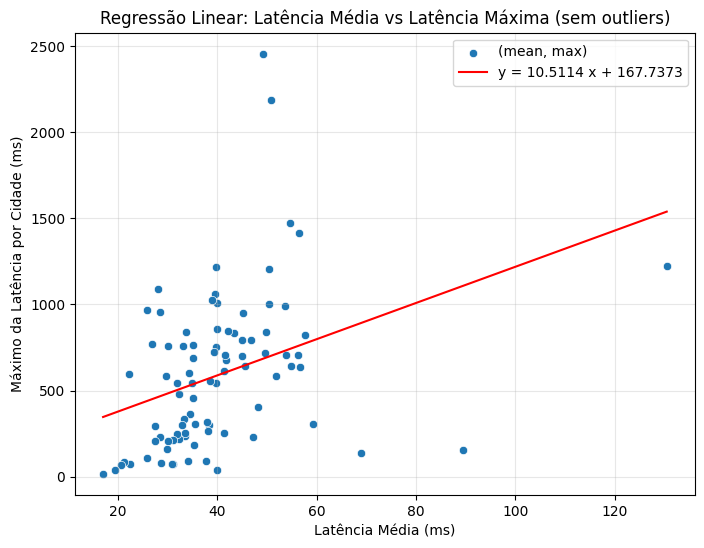

10.5114x + 167.7373


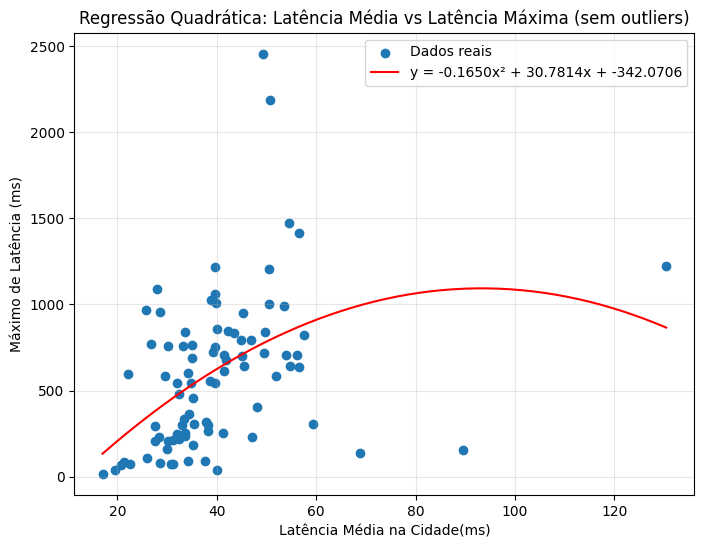

-0.1650x^2 + 30.7814x + -342.0706
Ponto m√≠nimo da equa√ß√£o: x = 93.2794

R¬≤ linear: 0.1293
R¬≤ quad: 0.1842


In [ ]:
# Max e Mean


dados = lat_city[['mean', 'max']].dropna()

# Dados
x = dados['mean'].values.reshape(-1, 1)
y = dados['max'].values

# Regress√£o
modelo = LinearRegression().fit(x, y)
y_pred = modelo.predict(x)
a = modelo.coef_[0]
b = modelo.intercept_
r1 = modelo.score(x,y)


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['mean'], y=dados['max'], label='(mean, max)')
plt.plot(dados['mean'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.ylabel('M√°ximo da Lat√™ncia por Cidade (ms)')
plt.xlabel('Lat√™ncia M√©dia (ms)')
plt.title('Regress√£o Linear: Lat√™ncia M√©dia vs Lat√™ncia M√°xima (sem outliers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f"{a:.4f}x + {b:.4f}")

# Dados
x = dados['mean'].values
y = dados['max'].values

# Ajuste polinomial de grau 2 (quadr√°tico)
coefs = np.polyfit(x, y, 2)  # grau 2
a, b, c = coefs

# Gerar valores de x ordenados e y previstos
x_seq = np.linspace(min(x), max(x), 200)
y_pred = a * x_seq**2 + b * x_seq + c

# Plottar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados reais')
plt.plot(x_seq, y_pred, color='red', label=f'y = {a:.4f}x¬≤ + {b:.4f}x + {c:.4f}')
plt.ylabel('M√°ximo de Lat√™ncia (ms)')
plt.xlabel('Lat√™ncia M√©dia na Cidade(ms)')
plt.title('Regress√£o Quadr√°tica: Lat√™ncia M√©dia vs Lat√™ncia M√°xima (sem outliers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Ajuste do modelo quadr√°tico (grau 2)
coefs = np.polyfit(x, y, 2)
a, b, c = coefs

# Predi√ß√µes do modelo
y_pred = a * x**2 + b * x + c

# M√©dia dos valores reais
y_mean = np.mean(y)

# Soma dos quadrados dos res√≠duos (SS_res)
ss_res = np.sum((y - y_pred)**2)

# Soma total dos quadrados (SS_tot)
ss_tot = np.sum((y - y_mean)**2)

# R2 manual
r2_manual = 1 - (ss_res / ss_tot)

x_min = (-b/(2*a))

print(f"{a:.4f}x^2 + {b:.4f}x + {c:.4f}")
print(f"Ponto m√≠nimo da equa√ß√£o: x = {x_min:.4f}\n")

print(f"R¬≤ linear: {r1:.4f}")
print(f"R¬≤ quad: {r2_manual:.4f}")


O valor da linear de R^2 √© muito baixo (R^2 < 0.1) e demonstra que n√£o √© nada preditivo. Na quadr√°tica h√° um aumento para 0.25, mas ainda √© uma rela√ß√£o de fraca a moderada.

Portanto, a regress√£o com dados sem outliers n√£o √© confi√°vel e n√£o pode ser feito com o m√°ximo. Isso √© f√°cilmente explicado visualizando o boxplot de lat√™ncias com outliers original. Uma grande parte dos m√°ximos foi excluida, e h√° um corte abrupto de qualquer m√°ximo ap√≥s certa faixa.

In [ ]:
latencia_media_por_cidade

city
Ra‚Äôs GhƒÅrib                     130.454545
Rosetta                          89.500000
Al Q≈´≈üƒ´yah                       68.857143
QufƒÅdah                          59.342857
Banƒ´ ‚ÄòUbayd                      57.600000
                                   ...    
Madƒ´nat as SƒÅdis min Ukt≈´bar     22.182320
Sidmant al Jabal                 21.238095
Qa≈ür al FarƒÅfirah                20.692308
SawƒÅdah                          19.400000
Al Qays                          17.000000
Name: avg_lat_ms, Length: 87, dtype: float64

In [ ]:
# Max e Mean

stats_cidade_com_outlier = {
    'Media' : latencia.mean(),
    'Mediana': latencia.median(),
    'Desvio Padr√£o': latencia.std(),
    'Vari√¢ncia': latencia.var(),
    'M√≠nimo': latencia.min(),
    'M√°ximo': latencia.max(),
    'Amplitude': latencia.max() - latencia.min(),
    'Coef. Varia√ß√£o': (latencia.std() / latencia.mean()) * 100
}

dados = latencia[['Media', 'M√°ximo']].dropna()


# Dados
x = dados['Media'].values.reshape(-1, 1)
y = dados['M√°ximo'].values

# Regress√£o
modelo = LinearRegression().fit(x, y)
y_pred = modelo.predict(x)
a = modelo.coef_[0]
b = modelo.intercept_
r1 = modelo.score(x,y)


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['Media'], y=dados['M√°ximo'], label='(Media, M√°ximo)')
plt.plot(dados['Media'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.ylabel('M√°ximo da Lat√™ncia por Cidade (ms)')
plt.xlabel('Lat√™ncia M√©dia (ms)')
plt.title('Regress√£o Linear: Lat√™ncia M√©dia vs Lat√™ncia M√°xima (sem outliers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f"{a:.4f}x + {b:.4f}")

# Dados
x = dados['mean'].values
y = dados['M√°ximo'].values

# Ajuste polinomial de grau 2 (quadr√°tico)
coefs = np.polyfit(x, y, 2)  # grau 2
a, b, c = coefs

# Gerar valores de x ordenados e y previstos
x_seq = np.linspace(min(x), max(x), 200)
y_pred = a * x_seq**2 + b * x_seq + c

# Plottar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados reais')
plt.plot(x_seq, y_pred, color='red', label=f'y = {a:.4f}x¬≤ + {b:.4f}x + {c:.4f}')
plt.ylabel('M√°ximo de Lat√™ncia (ms)')
plt.xlabel('Lat√™ncia M√©dia na Cidade(ms)')
plt.title('Regress√£o Quadr√°tica: Lat√™ncia M√©dia vs Lat√™ncia M√°xima (sem outliers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Ajuste do modelo quadr√°tico (grau 2)
coefs = np.polyfit(x, y, 2)
a, b, c = coefs

# Predi√ß√µes do modelo
y_pred = a * x**2 + b * x + c

# M√©dia dos valores reais
y_mean = np.mean(y)

# Soma dos quadrados dos res√≠duos (SS_res)
ss_res = np.sum((y - y_pred)**2)

# Soma total dos quadrados (SS_tot)
ss_tot = np.sum((y - y_mean)**2)

# R2 manual
r2_manual = 1 - (ss_res / ss_tot)

x_min = (-b/(2*a))

print(f"{a:.4f}x^2 + {b:.4f}x + {c:.4f}")
print(f"Ponto m√≠nimo da equa√ß√£o: x = {x_min:.4f}\n")

print(f"R¬≤ linear: {r1:.4f}")
print(f"R¬≤ quad: {r2_manual:.4f}")


KeyError: "None of [Index(['Media', 'M√°ximo'], dtype='object')] are in the [index]"

In [ ]:
##print(f"a reta √© dada por: y = {a:.4f} x +{b:.4f}")
##print(f"com coeficiente de determina√ß√£o (R): {r1:.4f}")


In [ ]:
# Features (X)
X = df[['avg_d_kbps', 'avg_u_kbps', 'tests', 'devices', 'centroid_lat', 'centroid_lon']]

# Target (Y)
y = df['avg_lat_ms']

# Modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
y_pred = model.predict

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['std'], y=dados['mean'], label='(std, mean)')
plt.plot(dados['std'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.grid(True, alpha=0.3)
plt.show()

KeyError: 'std'

<Figure size 800x600 with 0 Axes>

Vou refazer essa parte

In [ ]:
#Variavies
x = df_sem_outliers[['avg_d_kbps', 'avg_u_kbps', 'tests', 'devices', 'centroid_lat', 'centroid_lon']]
y = df_sem_outliers['avg_lat_ms']

In [ ]:
import statsmodels.api as sm
#adicionando um termo de intercepta√ß√£o(cte) √† matriz de features(X)
x_sm = sm.add_constant(x)

#usando Minimos Quadrados
model = sm.OLS(y, x_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_lat_ms   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     298.9
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:19:57   Log-Likelihood:                -64210.
No. Observations:               16157   AIC:                         1.284e+05
Df Residuals:                   16150   BIC:                         1.285e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.2688      8.216      1.737   

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

std ‚Äî R¬≤: 0.2231, RMSE: 3.049 ms
count ‚Äî R¬≤: 0.0327, RMSE: 3.828 ms
cv ‚Äî R¬≤: 0.2830, RMSE: 2.929 ms
iqr ‚Äî R¬≤: 0.0286, RMSE: 3.836 ms


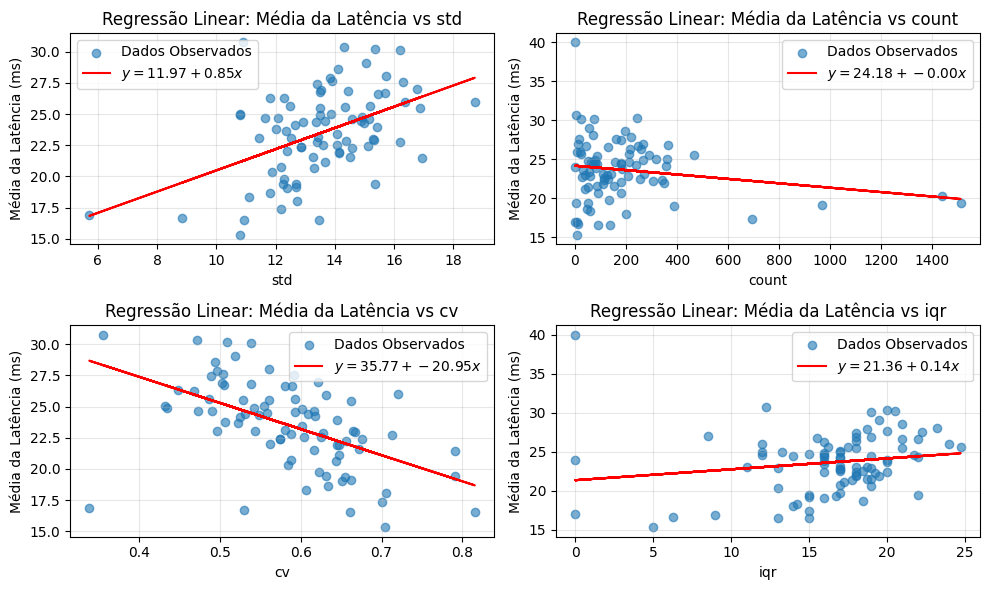

In [ ]:
def regressao_per_categ(nome):
    # Sele√ß√£o das vari√°veis
    X = stats_cidade[[nome]].dropna()
    y = stats_cidade.loc[X.index, 'mean']  # Y correspondente

    # Modelo
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Previs√µes
    y_pred = modelo.predict(X)

    # Avalia√ß√£o
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # Coeficientes
    coeficientes = pd.Series(modelo.coef_, index=X.columns)
    intercepto = modelo.intercept_

    return intercepto, coeficientes, r2, rmse, y_pred, y, X

def plotar(ax, x, y, y_pred, intercepto, coeficientes, r2, rmse, nome):
    ax.scatter(x[nome], y, alpha=0.6, label='Dados Observados')
    ax.plot(x[nome], y_pred, color='red', label=f'$y = {intercepto:.2f} + {coeficientes[nome]:.2f}x$')
    ax.set_xlabel(nome)
    ax.set_ylabel('M√©dia da Lat√™ncia (ms)')
    ax.set_title(f'Regress√£o Linear: M√©dia da Lat√™ncia vs {nome}')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Voc√™ pode imprimir os resultados fora se preferir:
    print(f"{nome} ‚Äî R¬≤: {r2:.4f}, RMSE: {rmse:.3f} ms")

# Criar figura com 4 subplots lado a lado
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()
categ = ['std', 'count', 'cv', 'iqr']

for ax, item in zip(axs, categ):
    i, c, r, rm, yp, yy, xx = regressao_per_categ(item)
    plotar(ax, xx, yy, yp, i, c, r, rm, item)

plt.tight_layout()
plt.show()


 Regress√£o Linear M√∫ltipla: M√©dia da Lat√™ncia
Equa√ß√£o: y = 23.07 + 1.71¬∑std + 0.00¬∑count + -38.75¬∑cv + -0.01¬∑iqr
R¬≤: 0.9662
RMSE: 0.636 ms


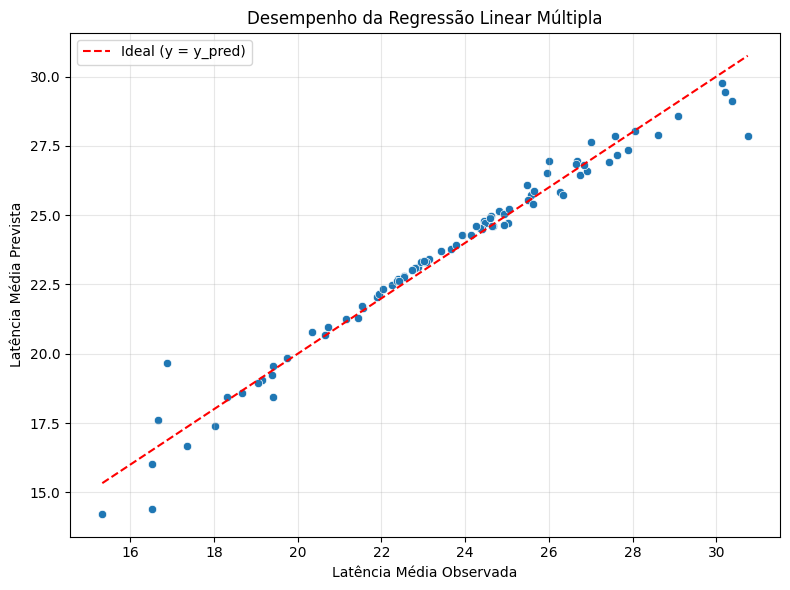

In [ ]:
# Sele√ß√£o das vari√°veis (ajuste conforme seu DataFrame)
X = stats_cidade[['std', 'count', 'cv', 'iqr']].dropna()
y = stats_cidade.loc[X.index, 'mean']  # Y correspondente

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Previs√µes
y_pred = modelo.predict(X)

# Avalia√ß√£o
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)
intercepto = modelo.intercept_

# Exibe resultados
print(" Regress√£o Linear M√∫ltipla: M√©dia da Lat√™ncia")
print(f"Equa√ß√£o: y = {intercepto:.2f} + " + " + ".join([f"{coef:.2f}¬∑{col}" for col, coef in coeficientes.items()]))
print(f"R¬≤: {r2:.4f}")
print(f"RMSE: {rmse:.3f} ms")

# Opcional: Gr√°fico da predi√ß√£o vs real
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal (y = y_pred)')
plt.xlabel('Lat√™ncia M√©dia Observada')
plt.ylabel('Lat√™ncia M√©dia Prevista')
plt.title('Desempenho da Regress√£o Linear M√∫ltipla')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### **ANOVA**

Objetivo: comparar as m√©dias de tr√™s ou mais grupos (ou n√≠veis de um fator) de uma vari√°vel quantitativa, para determinar se pelo menos uma dessas m√©dias √© estatisticamente diferente das outras


* Variabilidade Entre Grupos (Between-Group Variability): Reflete a diferen√ßa entre as m√©dias dos grupos. Se as m√©dias dos grupos s√£o muito diferentes umas das outras, essa variabilidade ser√° alta.

* Variabilidade Dentro dos Grupos (Within-Group Variability ou Erro): Reflete a varia√ß√£o natural dentro de cada grupo. √â a variabilidade que n√£o pode ser explicada pelas diferen√ßas entre os grupos.

H_0 = a lat√™ncia m√©dia √© igual nas 3 regioes

H_1 =  pelo menos uma √© diferente das demais

nivel de confian√ßa = 5%

In [ ]:
#dataset com dados referente as cidade e latencia media
df_anova = df_sem_outliers[['city','avg_lat_ms']].dropna()

#categorizando city
df_anova['city'] = df_anova['city'].astype('category')

print("### DataFrame preparado para ANOVA (df_anova) ###")
print(df_anova.head())
print("\nVerificando tipos de dados:")
print(df_anova.dtypes)

### DataFrame preparado para ANOVA (df_anova) ###
                city  avg_lat_ms
0  Qa≈ür al FarƒÅfirah           4
1  Qa≈ür al FarƒÅfirah          17
2  Qa≈ür al FarƒÅfirah          13
3  Qa≈ür al FarƒÅfirah          14
4  Qa≈ür al FarƒÅfirah          11

Verificando tipos de dados:
city          category
avg_lat_ms       int64
dtype: object


In [ ]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

In [ ]:
# Construir o modelo OLS para a ANOVA
# 'C(city)' informa ao statsmodels para tratar 'city' como uma vari√°vel categ√≥rica
modelo_anova = smf.ols('avg_lat_ms ~ C(city)', data=df_anova).fit()

# Realizar a An√°lise de Vari√¢ncia (ANOVA)
tabela_anova = anova_lm(modelo_anova, typ=2)

print("\n### Tabela de Resultados da ANOVA (M√©dia da Lat√™ncia por Cidade) ###")
print(tabela_anova.to_markdown(numalign="left", stralign="left"))


### Tabela de Resultados da ANOVA (M√©dia da Lat√™ncia por Cidade) ###
|          | sum_sq     | df    | F       | PR(>F)       |
|:---------|:-----------|:------|:--------|:-------------|
| C(city)  | 171197     | 86    | 11.4091 | 1.14673e-146 |
| Residual | 2.8039e+06 | 16070 | nan     | nan          |


In [ ]:
#dados descritivos
print("N√∫mero de cidades √∫nicas:", df_anova['city'].nunique())
print("\nContagem de observa√ß√µes por cidade:")
print(df_anova['city'].value_counts())
print("\n")

N√∫mero de cidades √∫nicas: 87

Contagem de observa√ß√µes por cidade:
city
Cairo                           1511
Al KhƒÅnkah                      1438
Al ‚ÄòƒÄshir min Rama·∏ëƒÅn            966
Madƒ´nat as SƒÅdis min Ukt≈´bar     693
Bilbays                          467
                                ... 
SawƒÅdah                            5
Al Q≈´≈üƒ´yah                         4
Al Qays                            1
Ma≈£ƒÅy                              1
Rosetta                            1
Name: count, Length: 87, dtype: int64




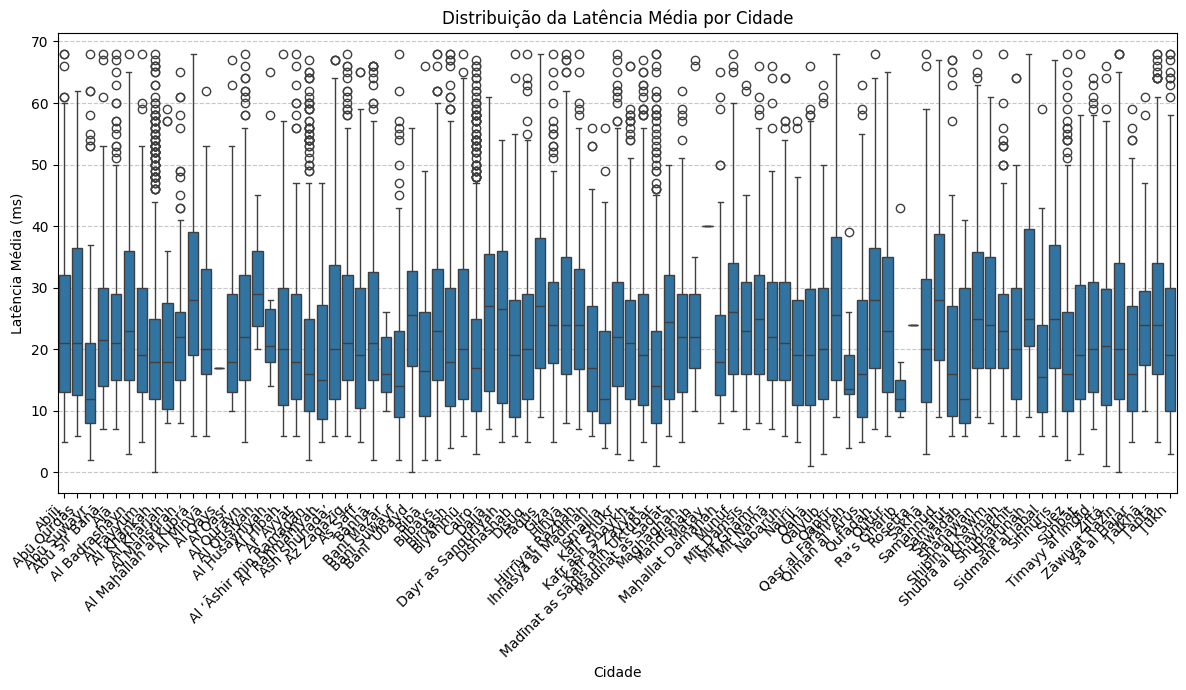

In [ ]:

# --- Visualiza√ß√£o: Box Plot da Lat√™ncia por Cidade ---
# Um box plot √© excelente para visualizar a distribui√ß√£o e as m√©dias de grupos.
plt.figure(figsize=(12, 7))
sns.boxplot(x='city', y='avg_lat_ms', data=df_anova)
plt.title('Distribui√ß√£o da Lat√™ncia M√©dia por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Lat√™ncia M√©dia (ms)')
plt.xticks(rotation=45, ha='right') # Rotacionar r√≥tulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O nosso espa√ßo possui 87 dimesn√µes, o que dificulta na visualiza√ß√£o dos bloxplots e dados pro anova. Por isso, optou-se por dividir em 3 categorias - Norte, Central e Sul.

 #### Cortando na horizontal


Contagem de observa√ß√µes por regi√£o geogr√°fica:
regiao_geografica
Regiao_Norte      15101
Regiao_Central      963
Regiao_Sul           93
Name: count, dtype: int64

### Tabela de Resultados da ANOVA (Lat√™ncia por Regi√£o Geogr√°fica) ###
|                      | sum_sq      | df    | F        | PR(>F)   |
|:---------------------|:------------|:------|:---------|:---------|
| C(regiao_geografica) | 244.606     | 2     | 0.664127 | 0.514737 |
| Residual             | 2.97485e+06 | 16154 | nan      | nan      |


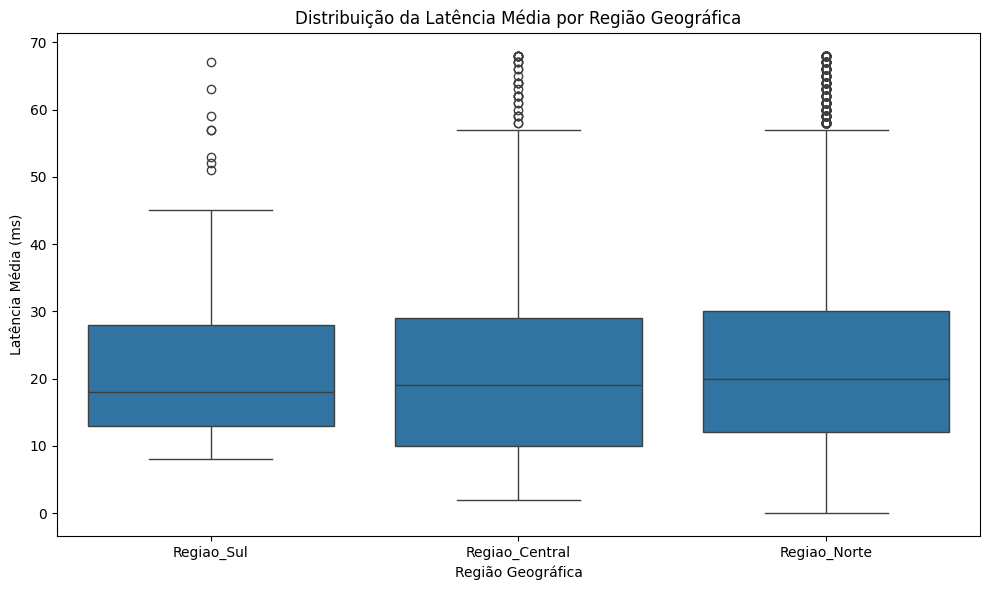


### Teste Post-Hoc de Tukey (Regi√£o Geogr√°fica) ###
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Regiao_Central Regiao_Norte   0.5048 0.5021 -0.5523  1.562  False
Regiao_Central   Regiao_Sul   0.0869 0.9981 -3.3671 3.5408  False
  Regiao_Norte   Regiao_Sul   -0.418 0.9528 -3.7264 2.8905  False
-----------------------------------------------------------------


In [ ]:
# Exemplo: Criando 3 regi√µes baseadas na latitude
#a distribui√ß√£o da latitude
#print(df['centroid_lat'].describe())

# limites para as regi√µes (ajuste com base na sua an√°lise descritiva)
# Ex: norte, central e oeste
lat_bins = pd.cut(df_sem_outliers['centroid_lat'], bins=3, labels=['Regiao_Sul', 'Regiao_Central', 'Regiao_Norte']) # Ajuste os labels
df_sem_outliers['regiao_geografica'] = lat_bins

#usando a 'regiao_geografica' na ANOVA
df_anova_regiao = df_sem_outliers[['avg_lat_ms', 'regiao_geografica']].dropna()
print("\nContagem de observa√ß√µes por regi√£o geogr√°fica:")
print(df_anova_regiao['regiao_geografica'].value_counts())

if df_anova_regiao['regiao_geografica'].nunique() >= 2: # ANOVA precisa de pelo menos 2 grupos, mas geralmente 3+ √© o objetivo
    modelo_anova_regiao = smf.ols('avg_lat_ms ~ C(regiao_geografica)', data=df_anova_regiao).fit()
    tabela_anova_regiao = anova_lm(modelo_anova_regiao, typ=2)
    print("\n### Tabela de Resultados da ANOVA (Lat√™ncia por Regi√£o Geogr√°fica) ###")
    print(tabela_anova_regiao.to_markdown(numalign="left", stralign="left"))

    # Plot da Lat√™ncia por Regi√£o
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='regiao_geografica', y='avg_lat_ms', data=df_anova_regiao)
    plt.title('Distribui√ß√£o da Lat√™ncia M√©dia por Regi√£o Geogr√°fica')
    plt.xlabel('Regi√£o Geogr√°fica')
    plt.ylabel('Lat√™ncia M√©dia (ms)')
    plt.tight_layout()
    plt.show()

    # Se significativo, rode Tukey para regi√µes
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_regiao = pairwise_tukeyhsd(endog=df_anova_regiao['avg_lat_ms'], groups=df_anova_regiao['regiao_geografica'], alpha=0.05)
    print("\n### Teste Post-Hoc de Tukey (Regi√£o Geogr√°fica) ###")
    print(tukey_result_regiao.summary().as_text())
else:
    print("N√£o h√° grupos suficientes em 'regiao_geografica' para ANOVA.")


* df (Graus de Liberdade): N√∫mero de categorias de cidades menos 1.
* sum_sq (Soma dos Quadrados): Representa a varia√ß√£o explicada pelas diferen√ßas entre as cidades.
mean_sq (Quadrado M√©dio): √â a soma dos quadrados dividida pelos graus de liberdade.
* F (Estat√≠stica F): O valor da estat√≠stica F. Um F grande sugere que h√° diferen√ßas significativas entre as m√©dias das cidades.
* PR(>F) (P-valor): Este √© o valor mais importante.
  * Se PR(>F) for menor que o seu n√≠vel de signific√¢ncia (geralmente 0.05): Voc√™ rejeita a hip√≥tese nula. Isso significa que h√° evid√™ncias estat√≠sticas de que a lat√™ncia m√©dia √© significativamente diferente em pelo menos uma das cidades.
  * Se PR(>F) for maior ou igual a 0.05: Voc√™ n√£o rejeita a hip√≥tese nula. Isso significa que n√£o h√° evid√™ncias suficientes para concluir que as lat√™ncias m√©dias s√£o diferentes entre as cidades.

Comparando este p-valor com o n√≠vel de signific√¢ncia comum (alpha) de 0.05: 0.514737 > 0.05
Como o p-valor (0.514737) √© maior que 0.05, voc√™ n√£o rejeita a hip√≥tese nula (H
0
‚Äã
 ).
Conclus√£o no Contexto do Problema:

Com base nesta an√°lise, n√£o h√° evid√™ncias estat√≠sticas suficientes para concluir que existem diferen√ßas significativas na lat√™ncia m√©dia da rede entre as regi√µes geogr√°ficas (Norte, Central, Sul) no Egito, usando a categoriza√ß√£o de latitude em 3 bins.
Em termos pr√°ticos, as varia√ß√µes na lat√™ncia que voc√™ observa entre essas tr√™s regi√µes podem ser atribu√≠das ao acaso ou √† variabilidade natural dos dados, e n√£o a uma diferen√ßa real e consistente imposta pela regi√£o geogr√°fica.
Implicac√µes:

Este resultado sugere que, para o seu modelo e a forma como as regi√µes foram definidas (divis√£o da latitude em 3 partes), a localiza√ß√£o geogr√°fica por si s√≥ (neste esquema de regi√µes) n√£o √© um fator determinante para as diferen√ßas na lat√™ncia m√©dia da rede no Egito.
Outros fatores n√£o inclu√≠dos nesta ANOVA (como densidade populacional, tipo de infraestrutura espec√≠fica em cada cidade, n√∫mero de dispositivos conectados, ou at√© mesmo varia√ß√µes intra-regionais maiores) podem estar explicando a maior parte da variabilidade da lat√™ncia.

#### cortando na vertical


Contagem de observa√ß√µes por regi√£o geogr√°fica:
regiao_geografica
Regiao_Central    9844
Regiao_Oeste      6230
Regiao_Leste        83
Name: count, dtype: int64

### Tabela de Resultados da ANOVA (Lat√™ncia por Regi√£o Geogr√°fica) ###
|                      | sum_sq      | df    | F       | PR(>F)     |
|:---------------------|:------------|:------|:--------|:-----------|
| C(regiao_geografica) | 4689.94     | 2     | 12.7527 | 2.9238e-06 |
| Residual             | 2.97041e+06 | 16154 | nan     | nan        |


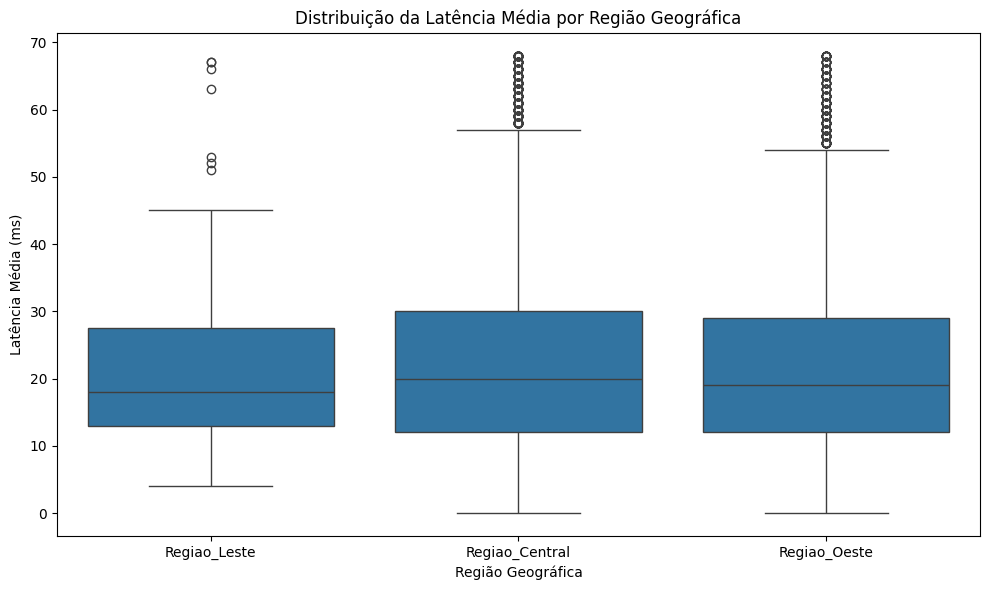


### Teste Post-Hoc de Tukey (Regi√£o Geogr√°fica) ###
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
Regiao_Central Regiao_Leste  -0.1481 0.9946 -3.6515  3.3554  False
Regiao_Central Regiao_Oeste  -1.1079    0.0 -1.6225 -0.5934   True
  Regiao_Leste Regiao_Oeste  -0.9599 0.7977 -4.4718  2.5521  False
------------------------------------------------------------------


In [ ]:
# Exemplo: Criando 3 regi√µes baseadas na latitude
#a distribui√ß√£o da latitude
#print(df['centroid_lon'].describe())

# limites para as regi√µes (ajuste com base na sua an√°lise descritiva)
# Ex: norte, central e oeste
lat_bins = pd.cut(df_sem_outliers['centroid_lon'], bins=3, labels=['Regiao_Leste', 'Regiao_Central', 'Regiao_Oeste']) # Ajuste os labels
df_sem_outliers['regiao_geografica'] = lat_bins

#usando a 'regiao_geografica' na ANOVA
df_anova_regiaoV = df_sem_outliers[['avg_lat_ms', 'regiao_geografica']].dropna()
print("\nContagem de observa√ß√µes por regi√£o geogr√°fica:")
print(df_anova_regiaoV['regiao_geografica'].value_counts())

if df_anova_regiaoV['regiao_geografica'].nunique() >= 2: # ANOVA precisa de pelo menos 2 grupos, mas geralmente 3+ √© o objetivo
    modelo_anova_regiaoV = smf.ols('avg_lat_ms ~ C(regiao_geografica)', data=df_anova_regiaoV).fit()
    tabela_anova_regiao = anova_lm(modelo_anova_regiaoV, typ=2)
    print("\n### Tabela de Resultados da ANOVA (Lat√™ncia por Regi√£o Geogr√°fica) ###")
    print(tabela_anova_regiao.to_markdown(numalign="left", stralign="left"))

    # Plot da Lat√™ncia por Regi√£o
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='regiao_geografica', y='avg_lat_ms', data=df_anova_regiaoV)
    plt.title('Distribui√ß√£o da Lat√™ncia M√©dia por Regi√£o Geogr√°fica')
    plt.xlabel('Regi√£o Geogr√°fica')
    plt.ylabel('Lat√™ncia M√©dia (ms)')
    plt.tight_layout()
    plt.show()

    # Se significativo, rode Tukey para regi√µes
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_regiao = pairwise_tukeyhsd(endog=df_anova_regiaoV['avg_lat_ms'], groups=df_anova_regiao['regiao_geografica'], alpha=0.05)
    print("\n### Teste Post-Hoc de Tukey (Regi√£o Geogr√°fica) ###")
    print(tukey_result_regiao.summary().as_text())
else:
    print("N√£o h√° grupos suficientes em 'regiao_geografica' para ANOVA.")

Como pf (2.9238e-06) √© muito menor que o nivel de confian√ßa(0.05), ent√£o rejeitamos a hipotese nula, ou seja, a hipotese de que pelo menos uma das regioes possui latencia media diferente √© verdadeira.

Ao contr√°rio da divis√£o Norte-Sul, a divis√£o Leste-Oeste parece ter um impacto discern√≠vel na lat√™ncia da rede. Isso pode ser devido a fatores como a concentra√ß√£o de infraestrutura de rede (cidades costeiras, proximidade de cabos submarinos no Leste, etc.), densidade populacional, ou tipos de terreno que afetam a implanta√ß√£o de rede.

o Teste de Tukey diz quais pares de m√©dias de grupos s√£o significativamente diferentes entre si
Interpretando os dados
* √â a diferen√ßa entre a m√©dia do group1 e a m√©dia do group2 (
Xmdgroup1 ‚àí Xmdgroup2).
* Um valor negativo significa que a m√©dia do group1 √© menor que a do group2.
* A magnitude do meandiff indica o tamanho da diferen√ßa observada

pvalor
* Se p-adj < 0.05 (ou seu n√≠vel de signific√¢ncia escolhido): Voc√™ rejeita a hip√≥tese nula para este par. Isso significa que a diferen√ßa na lat√™ncia m√©dia entre group1 e group2 √© estatisticamente significativa.
* Se p-adj $\ge$ 0.05: Voc√™ n√£o rejeita a hip√≥tese nula para este par. Isso significa que n√£o h√° evid√™ncias estat√≠sticas de que a diferen√ßa na lat√™ncia m√©dia entre group1 e group2 seja significativa.

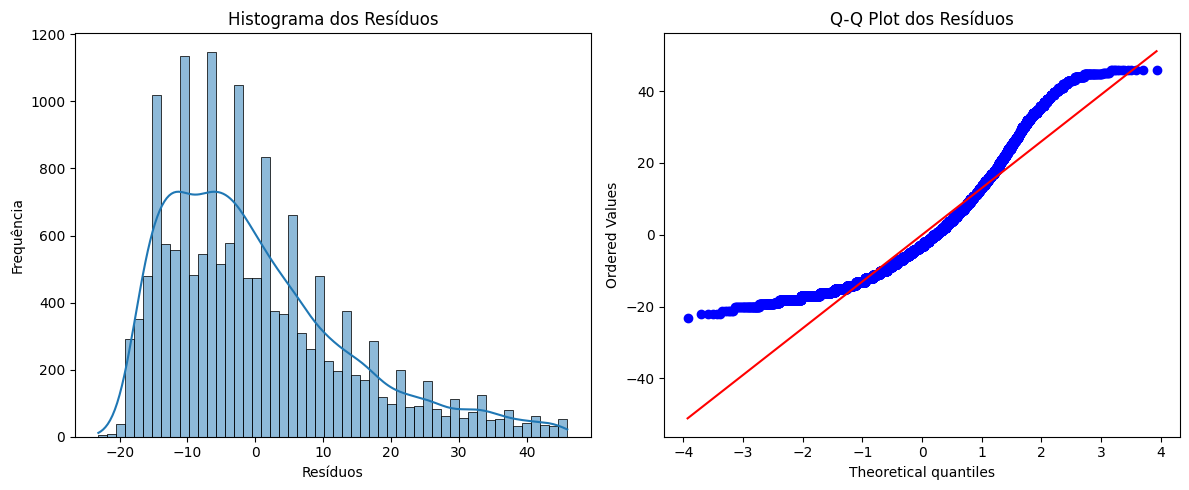


### Teste de Levene para Homogeneidade das Vari√¢ncias ###
Estat√≠stica de Levene: 10.4872
P-valor do Teste de Levene: 0.0000


In [ ]:
#Teste de Levene
residuos = modelo_anova_regiaoV.resid

# --- Verifica√ß√£o da Normalidade dos Res√≠duos ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Res√≠duos')
plt.xlabel('Res√≠duos')
plt.ylabel('Frequ√™ncia')

plt.subplot(1, 2, 2)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Res√≠duos')
plt.tight_layout()
plt.show()

# --- Verifica√ß√£o da Homogeneidade das Vari√¢ncias (Teste de Levene) ---
# As vari√¢ncias da lat√™ncia em cada grupo (regi√£o) devem ser similares.
# O teste de Levene √© robusto √† n√£o-normalidade.
# Precisamos dos dados de avg_lat_ms para cada grupo separadamente
grupos_latencia = [df_anova_regiao['avg_lat_ms'][df_anova_regiao['regiao_geografica'] == r].dropna()
                   for r in df_anova_regiao['regiao_geografica'].unique()]

# stats.levene(grupo1, grupo2, grupo3, ...)
# use *grupos_latencia para desempacotar a lista de arrays como argumentos separados
levene_statistic, levene_pvalue = stats.levene(*grupos_latencia, center='mean') # center='mean' ou 'median'

print(f"\n### Teste de Levene para Homogeneidade das Vari√¢ncias ###")
print(f"Estat√≠stica de Levene: {levene_statistic:.4f}")
print(f"P-valor do Teste de Levene: {levene_pvalue:.4f}")

# Interpreta√ß√£o do Teste de Levene:
# Se p-valor < 0.05: Rejeita H0, ou seja, as vari√¢ncias N√ÉO s√£o homog√™neas.
# Se p-valor >= 0.05: N√£o rejeita H0, ou seja, as vari√¢ncias s√£o homog√™neas.

### Teste de Independ√™ncia QUI-QUADRADO

### Tabela de Conting√™ncia (Cidade vs. Categoria de Dispositivos) ###
| city                         | Poucos Dispositivos   | Muitos Dispositivos   |
|:-----------------------------|:----------------------|:----------------------|
| Abjƒ´j                        | 135                   | 46                    |
| Ab≈´ QurqƒÅ≈ü                   | 8                     | 0                     |
| Ab≈´ ≈ûuwayr                   | 115                   | 23                    |
| Ab≈´ ≈ûƒ´r BanƒÅ                 | 30                    | 20                    |
| AjƒÅ                          | 99                    | 80                    |
| Al Badrashayn                | 100                   | 147                   |
| Al Fayy≈´m                    | 50                    | 59                    |
| Al KhƒÅnkah                   | 300                   | 1138                  |
| Al KhƒÅrjah                   | 28                    | 10                    |
| Al Man≈ü≈´rah         

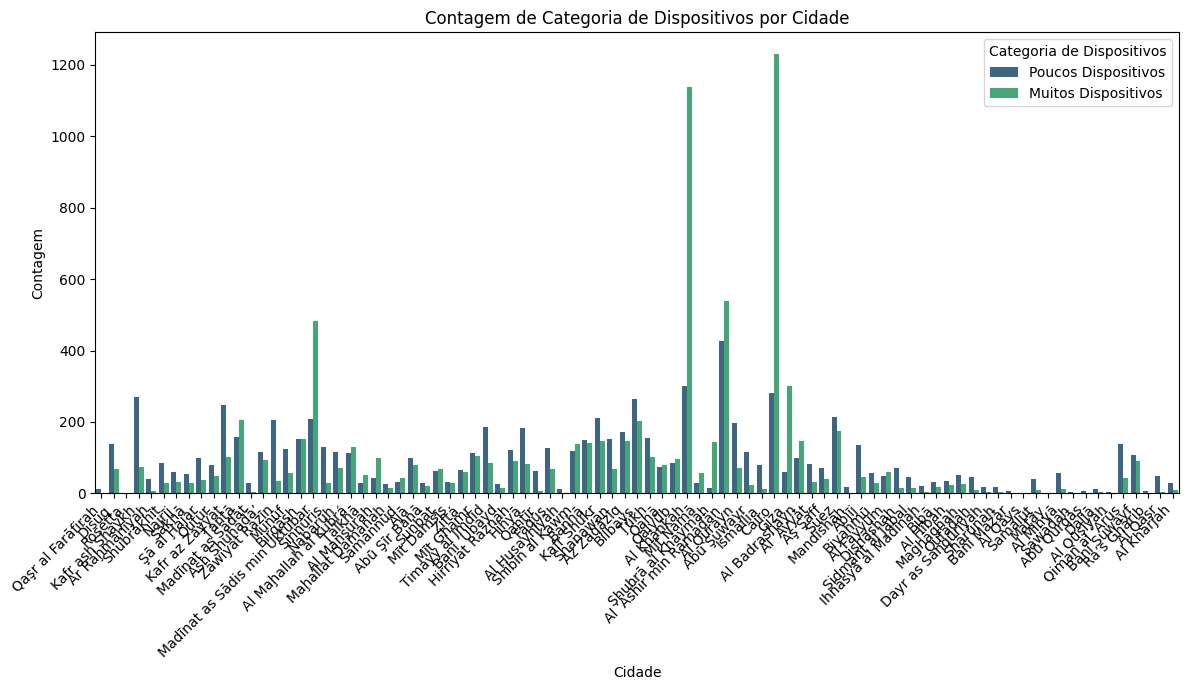

In [ ]:
from scipy.stats import chi2_contingency


# 1. Categorizar a vari√°vel 'devices'
# Vamos criar duas categorias: 'Poucos Dispositivos' e 'Muitos Dispositivos'
# O ponto de corte pode ser a mediana, a m√©dia, ou um valor que fa√ßa sentido para o neg√≥cio.
# Usarei a mediana como exemplo.

median_devices = df_sem_outliers['devices'].median()
df_sem_outliers['device_category'] = pd.cut(df_sem_outliers['devices'],
                               bins=[df_sem_outliers['devices'].min() - 1, median_devices, df_sem_outliers['devices'].max() + 1],
                               labels=['Poucos Dispositivos', 'Muitos Dispositivos'],
                               right=True # Intervalo inclui o lado direito
                              ).astype('category')

# Opcional: Se quiser 3 ou mais categorias, ajuste 'bins' e 'labels'.
# Por exemplo, para 3 categorias (Q1, Q2, Q3 para quartis):
# df_sem_outliers['device_category'] = pd.qcut(df['devices'], q=3, labels=['Baixo', 'M√©dio', 'Alto'], duplicates='drop').astype('category')


# 2. Criar a Tabela de Conting√™ncia
# Remova NaNs se houver, para garantir que todas as observa√ß√µes contribuam.
df_chi2 = df_sem_outliers[['city', 'device_category']].dropna()

contingency_table = pd.crosstab(df_chi2['city'], df_chi2['device_category'])

print("### Tabela de Conting√™ncia (Cidade vs. Categoria de Dispositivos) ###")
print(contingency_table.to_markdown(numalign="left", stralign="left"))
print("\n")

# 3. Executar o Teste Qui-Quadrado
# chi2: estat√≠stica Qui-Quadrado
# p: p-valor
# dof: graus de liberdade
# expected: frequ√™ncias esperadas
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("### Resultados do Teste de Independ√™ncia Qui-Quadrado ###")
print(f"Estat√≠stica Qui-Quadrado: {chi2:.4f}")
print(f"P-valor: {p:.4f}")
print(f"Graus de Liberdade (dof): {dof}")

# Opcional: Mostrar as frequ√™ncias esperadas
# print("\nFrequ√™ncias Esperadas (se houver independ√™ncia):")
# print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns).to_markdown(numalign="left", stralign="left"))


# --- Interpreta√ß√£o dos Resultados ---
print("\n### Interpreta√ß√£o ###")
if p < 0.05: # N√≠vel de signific√¢ncia comum
    print(f"Com um p-valor de {p:.4f} (menor que 0.05), rejeitamos a hip√≥tese nula.")
    print("Isso significa que h√° uma associa√ß√£o estatisticamente significativa entre a cidade e a categoria de n√∫mero de dispositivos.")
    print("A categoria de dispositivos n√£o √© independente da cidade.")
else:
    print(f"Com um p-valor de {p:.4f} (maior ou igual a 0.05), n√£o rejeitamos a hip√≥tese nula.")
    print("Isso significa que n√£o h√° evid√™ncias estat√≠sticas suficientes para afirmar uma associa√ß√£o entre a cidade e a categoria de n√∫mero de dispositivos.")
    print("A categoria de dispositivos parece ser independente da cidade.")


# --- Visualiza√ß√£o (Opcional: Gr√°fico de Barras Agrupadas ou de Contagem) ---
# Ajuda a visualizar as propor√ß√µes dentro de cada grupo
plt.figure(figsize=(12, 7))
sns.countplot(x='city', hue='device_category', data=df_chi2, palette='viridis')
plt.title('Contagem de Categoria de Dispositivos por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria de Dispositivos')
plt.tight_layout()
plt.show()

### Tabela de Conting√™ncia (Cidade vs. Categoria de Dispositivos) ###
| city                         | Baixo   | M√©dio   | Alto   |
|:-----------------------------|:--------|:--------|:-------|
| Abjƒ´j                        | 95      | 65      | 21     |
| Ab≈´ QurqƒÅ≈ü                   | 6       | 2       | 0      |
| Ab≈´ ≈ûuwayr                   | 88      | 47      | 3      |
| Ab≈´ ≈ûƒ´r BanƒÅ                 | 20      | 26      | 4      |
| AjƒÅ                          | 66      | 83      | 30     |
| Al Badrashayn                | 60      | 77      | 110    |
| Al Fayy≈´m                    | 32      | 25      | 52     |
| Al KhƒÅnkah                   | 195     | 261     | 982    |
| Al KhƒÅrjah                   | 0       | 35      | 3      |
| Al Man≈ü≈´rah                  | 28      | 47      | 66     |
| Al Ma·∏©allah al Kubr√°         | 76      | 85      | 83     |
| Al MinyƒÅ                     | 43      | 24      | 2      |
| Al Qays                      | 1      

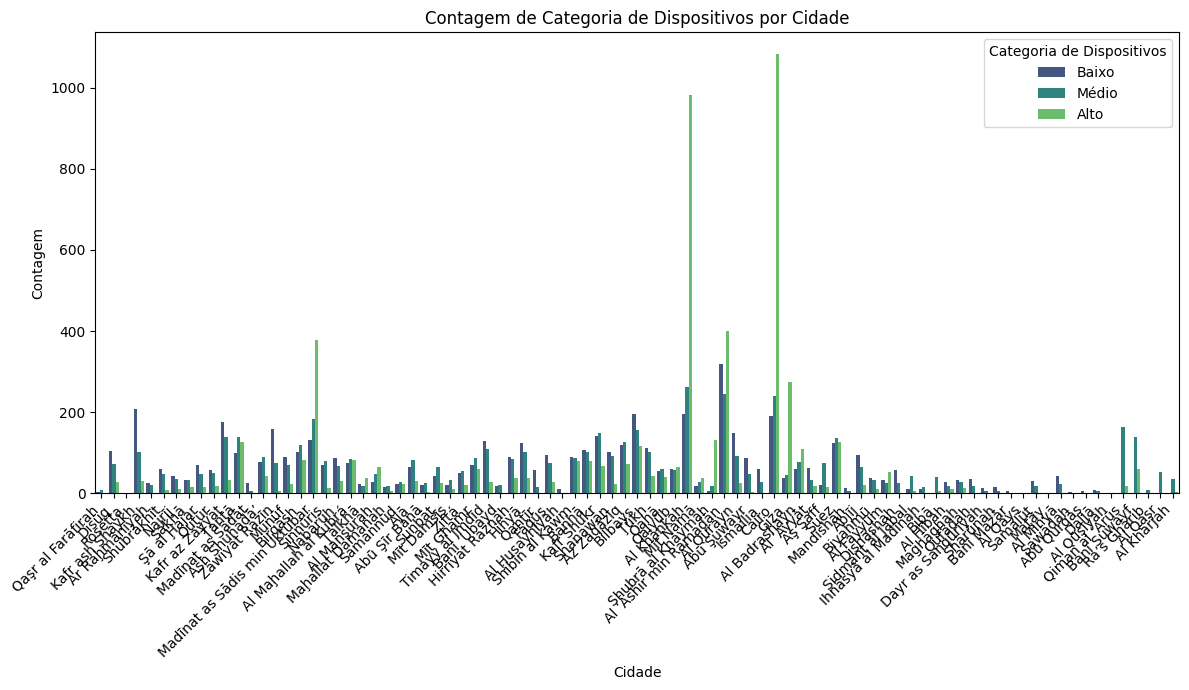

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Categorizar a vari√°vel 'devices'
# Usar a base df_sem_outliers consistentemente
df = df_sem_outliers.copy()

# Op√ß√£o A: 2 categorias pela mediana
'''median_devices = df['devices'].median()
df['device_category'] = pd.cut(df['devices'],
                               bins=[df['devices'].min() - 1, median_devices, df['devices'].max() + 1],
                               labels=['Poucos Dispositivos', 'Muitos Dispositivos'],
                               right=True
                              ).astype('category')'''

# Op√ß√£o B: (alternativa) 3 categorias por tercis ‚Äî descomente se quiser usar essa
q_labels = ['Baixo', 'M√©dio', 'Alto']
try:
    df['device_category'] = pd.qcut(df['devices'].rank(method='first'), q=3, labels=q_labels).astype('category')
except ValueError as e:
    print(f"Erro ao criar categorias com qcut: {e}")
    df['device_category'] = pd.cut(df['devices'],
                                   bins=[df['devices'].min() - 1, median_devices, df['devices'].max() + 1],
                                   labels=['Poucos Dispositivos', 'Muitos Dispositivos'],
                                   right=True
                                  ).astype('category')

# 2. Criar a Tabela de Conting√™ncia
df_chi2 = df[['city', 'device_category']].dropna()
contingency_table = pd.crosstab(df_chi2['city'], df_chi2['device_category'])

print("### Tabela de Conting√™ncia (Cidade vs. Categoria de Dispositivos) ###")
print(contingency_table.to_markdown(numalign="left", stralign="left"))
print("\n")

# 3. Teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("### Resultados do Teste de Independ√™ncia Qui-Quadrado ###")
print(f"Estat√≠stica Qui-Quadrado: {chi2:.4f}")
print(f"P-valor: {p:.4f}")
print(f"Graus de Liberdade (dof): {dof}")

# Interpreta√ß√£o
print("\n### Interpreta√ß√£o ###")
if p < 0.05:
    print("Rejeitamos a hip√≥tese nula. Existe associa√ß√£o entre cidade e categoria de dispositivos.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncia de associa√ß√£o entre cidade e categoria de dispositivos.")

# 4. Visualiza√ß√£o
plt.figure(figsize=(12, 7))
sns.countplot(x='city', hue='device_category', data=df_chi2, palette='viridis')
plt.title('Contagem de Categoria de Dispositivos por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria de Dispositivos')
plt.tight_layout()
plt.show()


üìä Resultado do Teste Qui-Quadrado
Estat√≠stica Qui-Quadrado: 5099.81

Graus de liberdade: 172

P-valor: 0.0000

‚úÖ Conclus√£o
Como o p-valor √© menor que 0.05, rejeitamos a hip√≥tese nula com seguran√ßa. Isso indica que:

Existe uma associa√ß√£o estatisticamente significativa entre a cidade e a categoria de n√∫mero de dispositivos.

Ou seja, a distribui√ß√£o dos dispositivos varia de forma n√£o aleat√≥ria entre as cidades ‚Äî algumas cidades t√™m uma concentra√ß√£o maior de usu√°rios com muitos dispositivos, outras com poucos, etc.

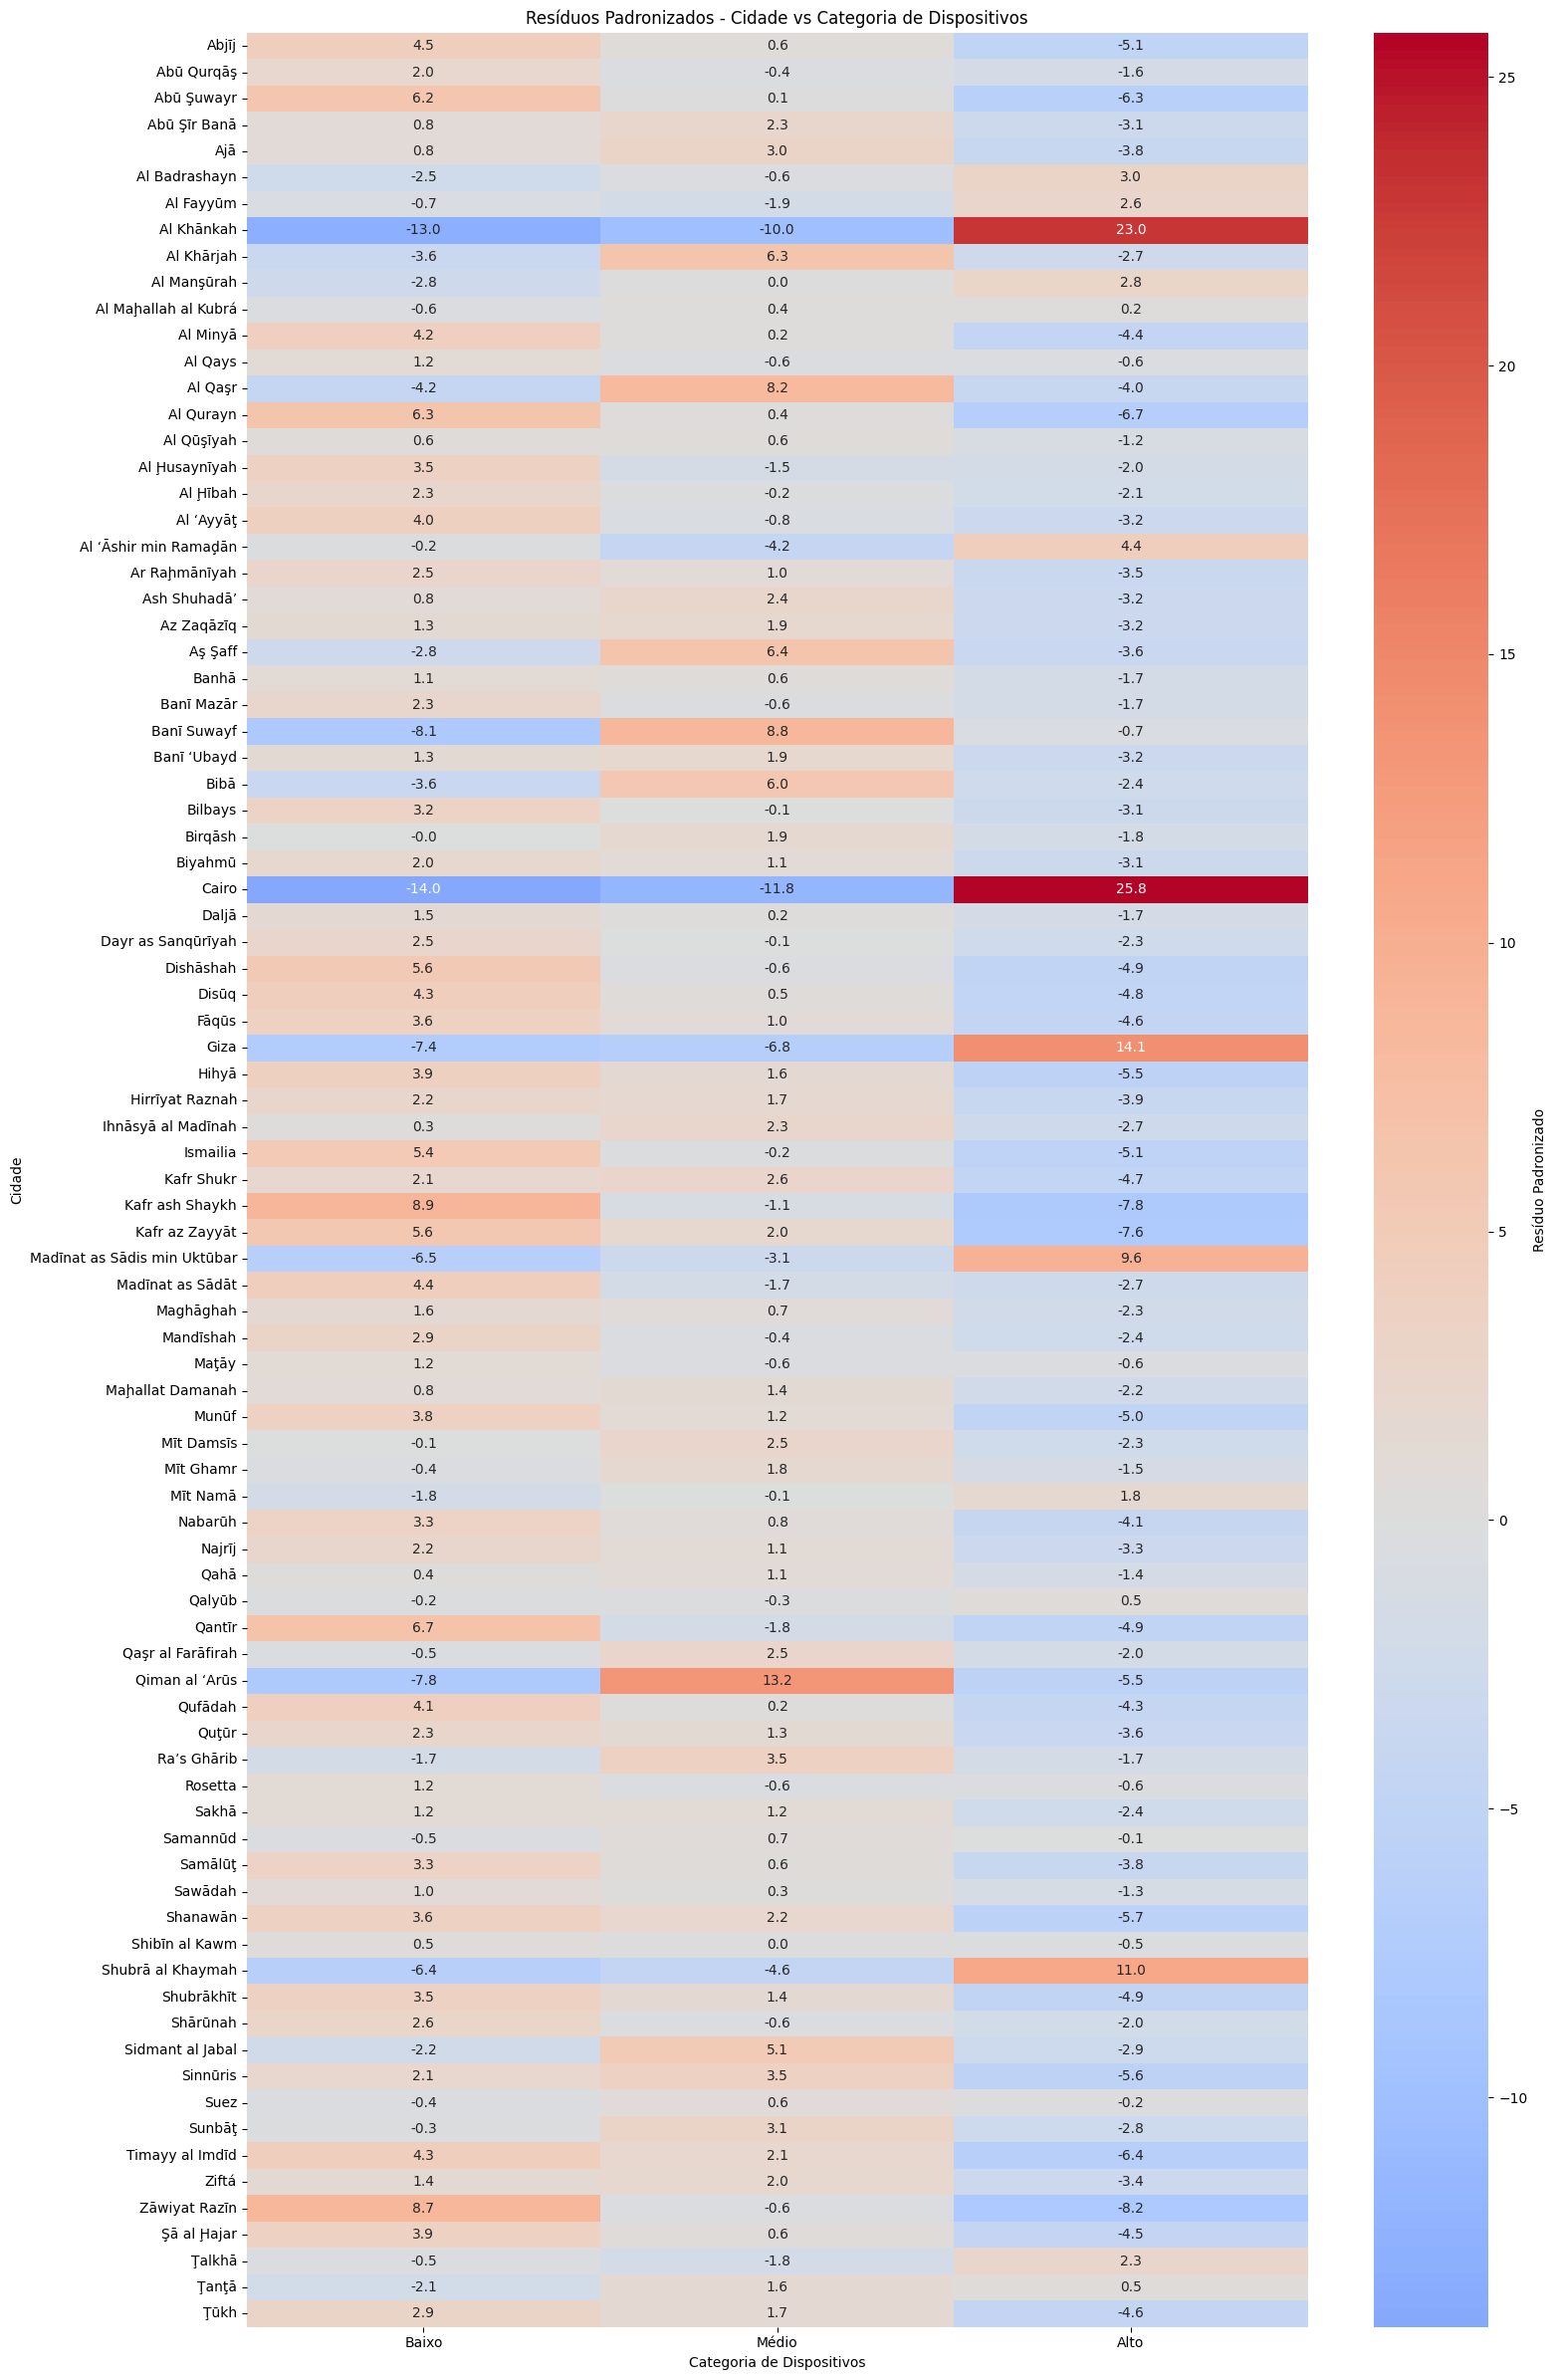

In [ ]:
# 1. Calcular a tabela esperada
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 2. Calcular os res√≠duos padronizados
observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)

# 3. Transformar em DataFrame
residuals_df = pd.DataFrame(residuals,
                            index=contingency_table.index,
                            columns=contingency_table.columns)

# 4. Visualiza√ß√£o com Heatmap
plt.figure(figsize=(16, 24))
sns.heatmap(residuals_df, cmap='coolwarm', center=0, annot=True, fmt=".1f", cbar_kws={"label": "Res√≠duo Padronizado"})
plt.title("Res√≠duos Padronizados - Cidade vs Categoria de Dispositivos")
plt.xlabel("Categoria de Dispositivos")
plt.ylabel("Cidade")
plt.tight_layout()
plt.show()


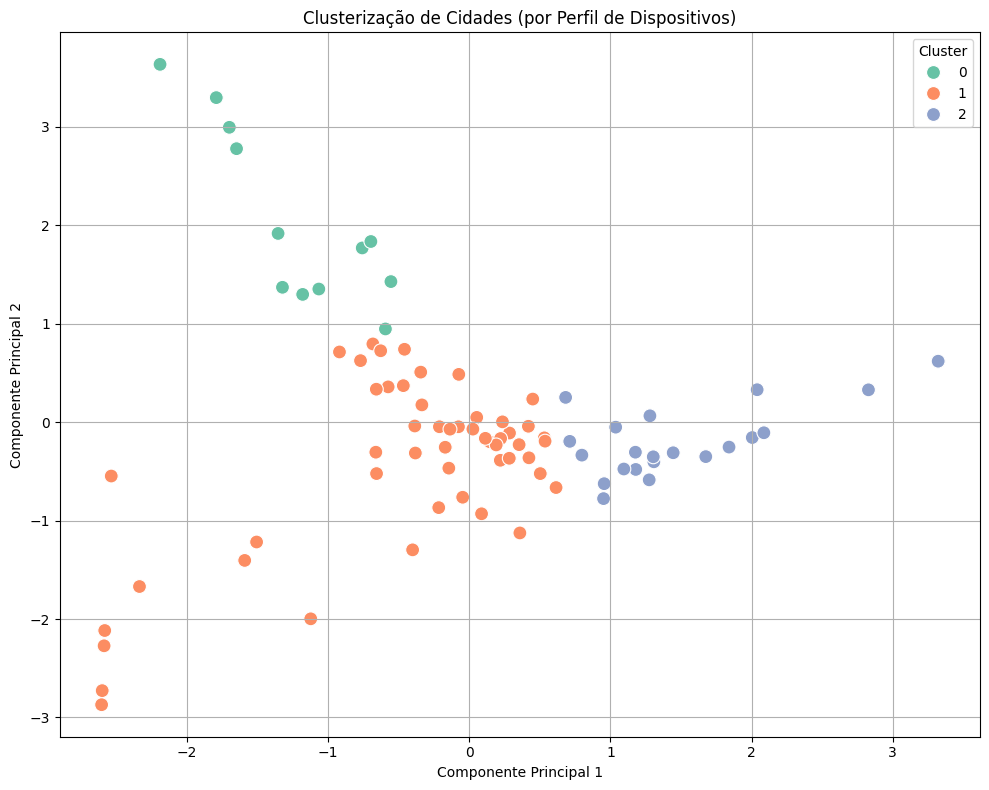

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Normalizar a tabela (propor√ß√µes por cidade)
city_profile = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# 2. Padronizar os dados (opcional mas recomendado para K-Means)
scaler = StandardScaler()
city_scaled = scaler.fit_transform(city_profile)

# 3. Aplicar K-Means (definindo 3 clusters como exemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(city_scaled)

# 4. Adicionar o cluster ao DataFrame
clustered_cities = city_profile.copy()
clustered_cities['cluster'] = clusters

# 5. Visualiza√ß√£o com PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(city_scaled)
clustered_cities['pca1'] = pca_result[:, 0]
clustered_cities['pca2'] = pca_result[:, 1]

# 6. Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=clustered_cities, x='pca1', y='pca2', hue='cluster', palette='Set2', s=100)
plt.title("Clusteriza√ß√£o de Cidades (por Perfil de Dispositivos)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
